In [ ]:
#importing libraries


import pandas as pd
import numpy as np

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# machine learning tools
from sklearn.preprocessing import (StandardScaler,
                                   OneHotEncoder,
                                   power_transform,
                                   FunctionTransformer)
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import (StratifiedKFold,
                                     cross_val_predict,
                                     cross_val_score,
                                     train_test_split,
                                     GridSearchCV)

# imblearn tools
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import (AdaBoostClassifier,
                              RandomForestClassifier,
                              ExtraTreesClassifier, 
                              GradientBoostingClassifier,
                              BaggingClassifier)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import (BalancedBaggingClassifier,
                               BalancedRandomForestClassifier,
                               EasyEnsembleClassifier)
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve)

# style
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

plt.style.use("seaborn")

# warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<ipython-input-2-707d05dacb2c>:56: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
#data = pd.read_csv("F:/sem 8 winter/Predictive Analytics/WA_Fn-UseC_-Telco-Customer-Churn.csv.xls")
data=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv.xls")
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL      

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Total charges cant be object
for i in range(len(data["TotalCharges"])):
    val = data["TotalCharges"][i]
    try:
        float(val)
    except:
        print(f"Row {i} has a value of TotalCharges = {val}")

Row 488 has a value of TotalCharges =  
Row 753 has a value of TotalCharges =  
Row 936 has a value of TotalCharges =  
Row 1082 has a value of TotalCharges =  
Row 1340 has a value of TotalCharges =  
Row 3331 has a value of TotalCharges =  
Row 3826 has a value of TotalCharges =  
Row 4380 has a value of TotalCharges =  
Row 5218 has a value of TotalCharges =  
Row 6670 has a value of TotalCharges =  
Row 6754 has a value of TotalCharges =  


In [ ]:
#convert strings to numeric values
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = "coerce")

In [ ]:
#check for number of missing values
data["TotalCharges"].isnull().sum()

11

In [ ]:
#Drop 11 entities
data.dropna(axis = 0, inplace = True)
assert data["TotalCharges"].isnull().sum() == 0

In [ ]:
#Duplicate Row verification
data.duplicated().sum()

0

In [ ]:
# convert columns to categoris
cols_to_cat = ["SeniorCitizen","gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
               "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", 
               "PaperlessBilling", "PaymentMethod", "Churn"]

for col in cols_to_cat:
    data[col] = data[col].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

In [ ]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
#a peek to the dataset
data.describe(include="category")

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [ ]:
#to check the unique values under each category
category = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
               "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", 
               "PaperlessBilling", "PaymentMethod"]
print("--Col name--", end =" "*(26 - len(col)) + "\t\t")
print("--Unique values--", end = "")
print("\n" + ("-"*50))
for col in category:
    print(f"{col}:", end =" "*(26 - len(col)) + "\t\t")
    unique = data[col].unique()
    for val in unique:
        print(f"{val}", end = " - ")
    print("\n" + ("-"*150))

--Col name--                     		--Unique values--
--------------------------------------------------
gender:                    		Female - Male - 
------------------------------------------------------------------------------------------------------------------------------------------------------
SeniorCitizen:             		0 - 1 - 
------------------------------------------------------------------------------------------------------------------------------------------------------
Partner:                   		Yes - No - 
------------------------------------------------------------------------------------------------------------------------------------------------------
Dependents:                		No - Yes - 
------------------------------------------------------------------------------------------------------------------------------------------------------
PhoneService:              		No - Yes - 
-------------------------------------------------------------------------------------

In [ ]:
data["Churn"].replace({"Yes": 1, "No": 0}, inplace = True)

Visualizations

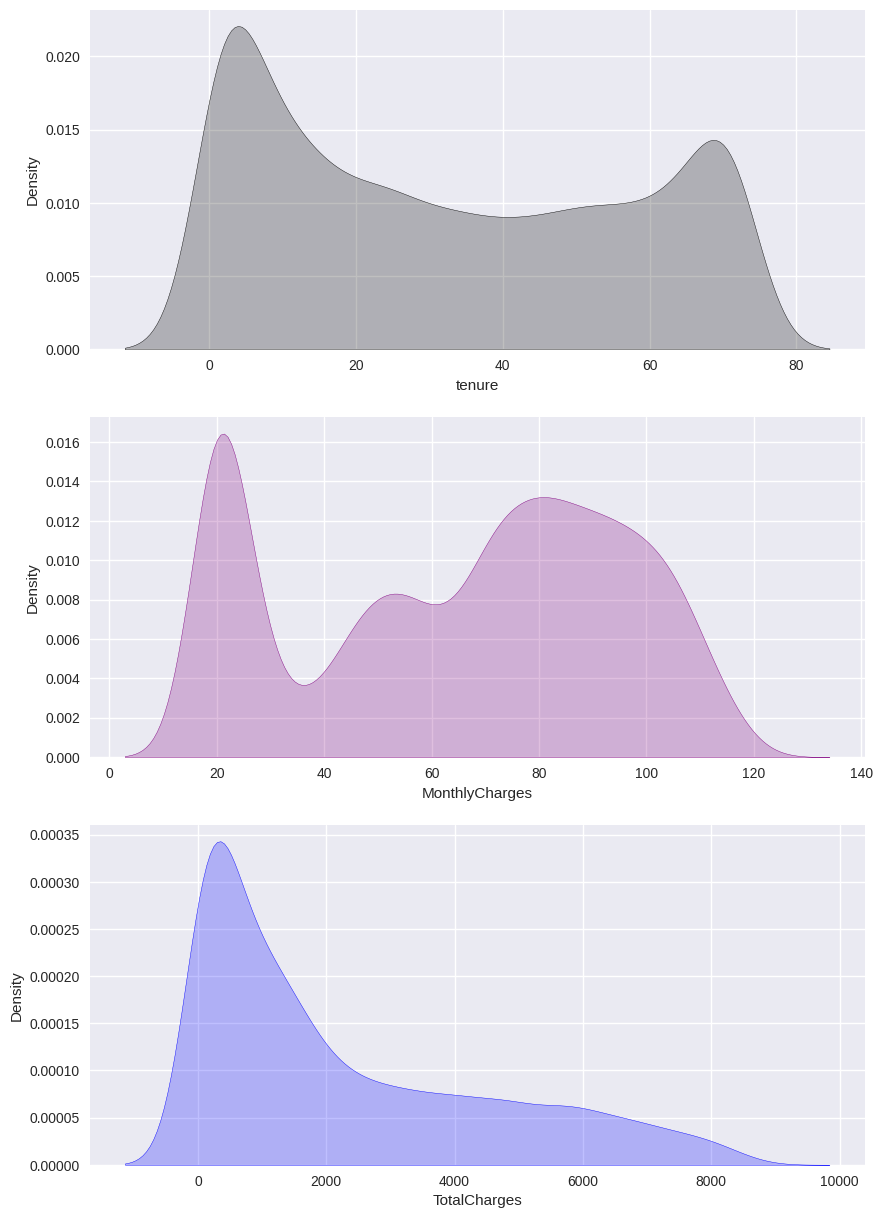

In [ ]:
#to have an insight and understand the data
fig, ax = plt.subplots(3, figsize = (10, 15))
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
colors = ["black", "purple", "blue"]
for i, (col, color) in enumerate(zip(num_cols, colors)):
    sns.kdeplot(data = data, x = col, ax = ax[i], fill = True, color = color)

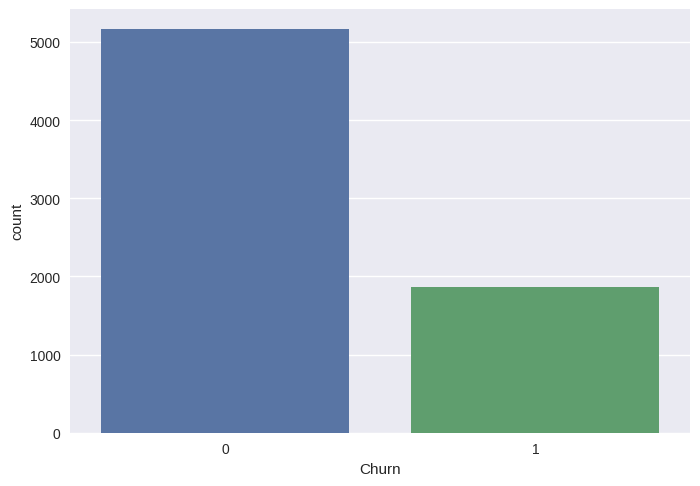

In [ ]:
sns.countplot(data = data, x = 'Churn');

<Axes: >

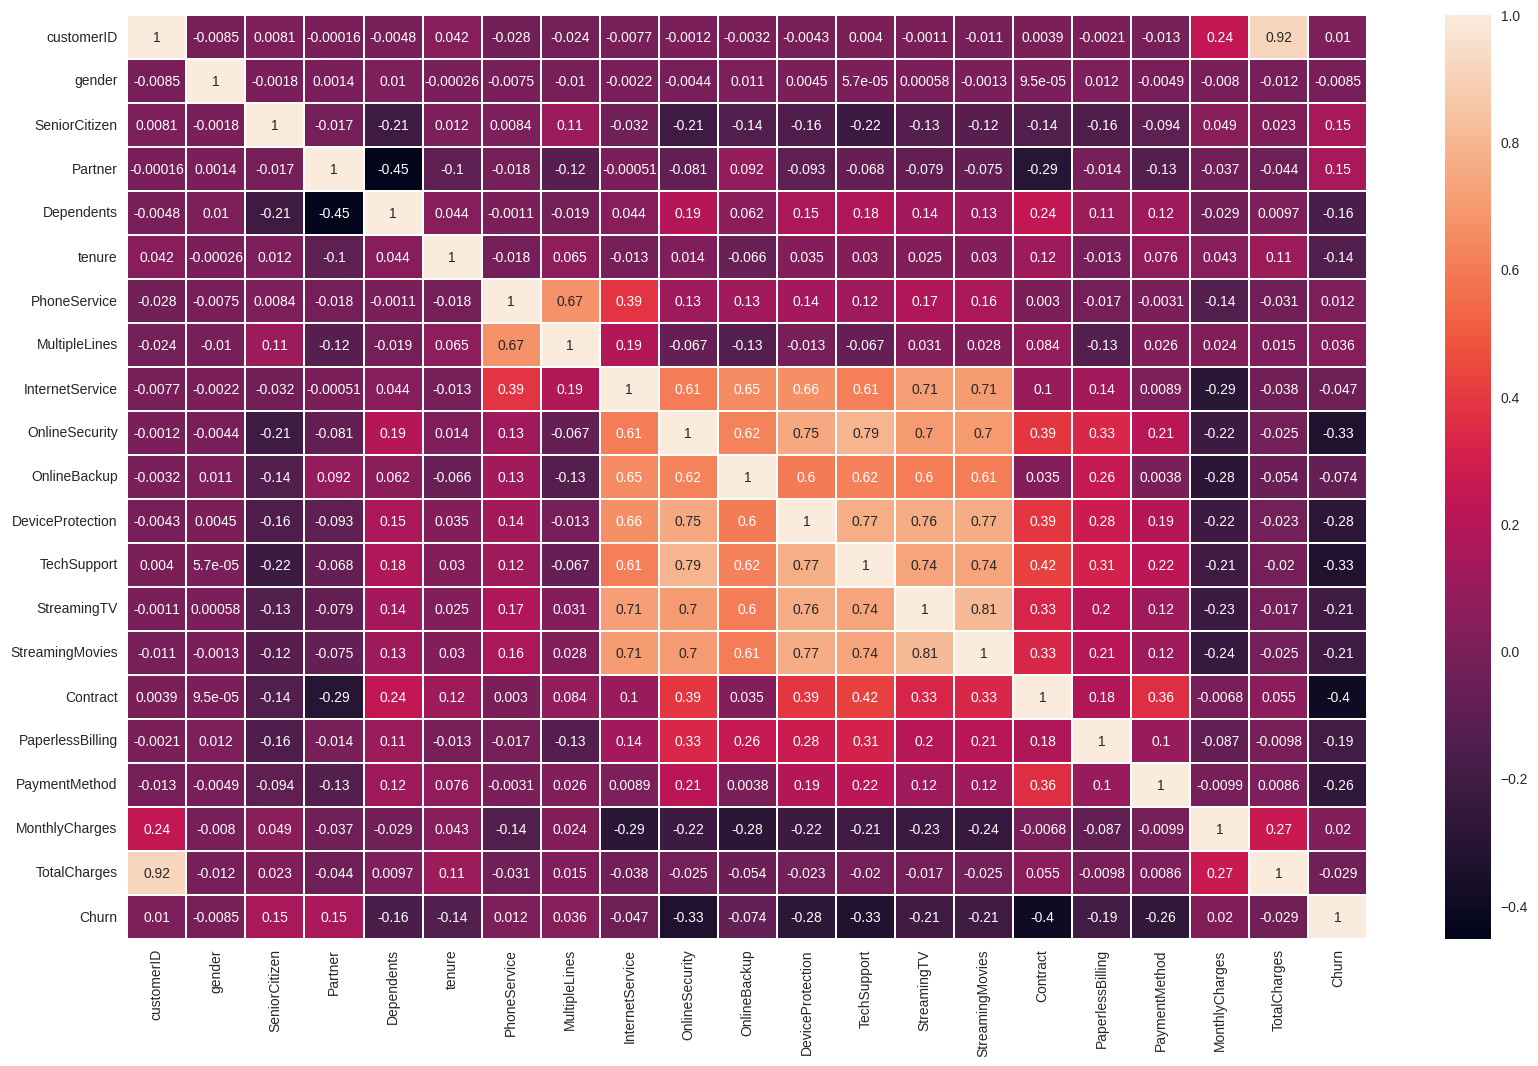

In [ ]:
#corelation between features
plt.figure(figsize=(20, 12))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths=.2, annot = True)

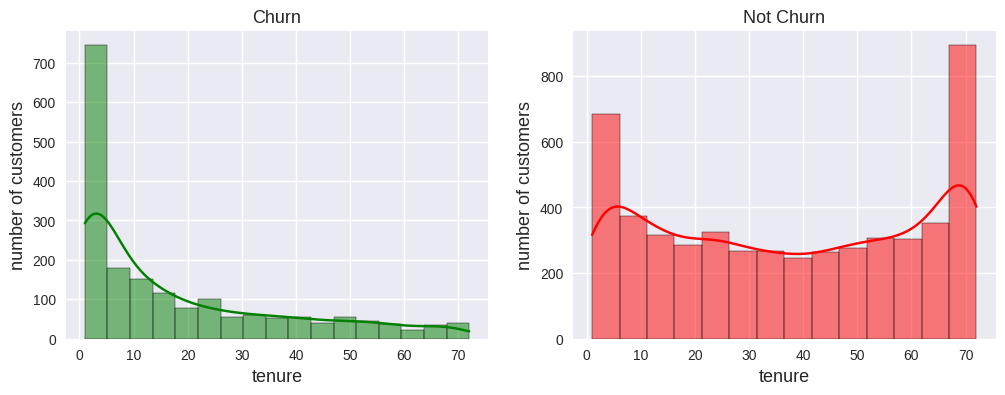

In [ ]:
Churn_data = data[data.Churn == 1]
not_Churn_data = data[data.Churn == 0]
def numeric_plot(feature):
    fig, ax = plt.subplots(1, 2, figsize = (12, 4))
    sns.histplot(data = Churn_data, x = feature, ax = ax[0], color = 'green', kde = True)
    sns.histplot(data = not_Churn_data, x = feature, ax = ax[1], color = 'red', kde = True)
    ax[0].set_xlabel(feature, size = 13)
    ax[0].set_ylabel('number of customers', size = 13)
    ax[0].set_title('Churn', size = 13)
    ax[1].set_xlabel(feature, size = 13)
    ax[1].set_ylabel('number of customers', size = 13)
    ax[1].set_title('Not Churn', size = 13)
    plt.show()
numeric_plot('tenure')

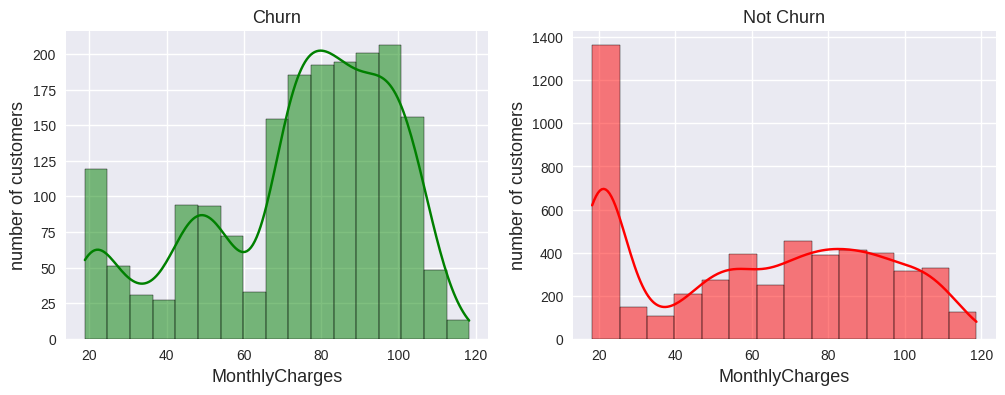

In [ ]:
numeric_plot('MonthlyCharges')

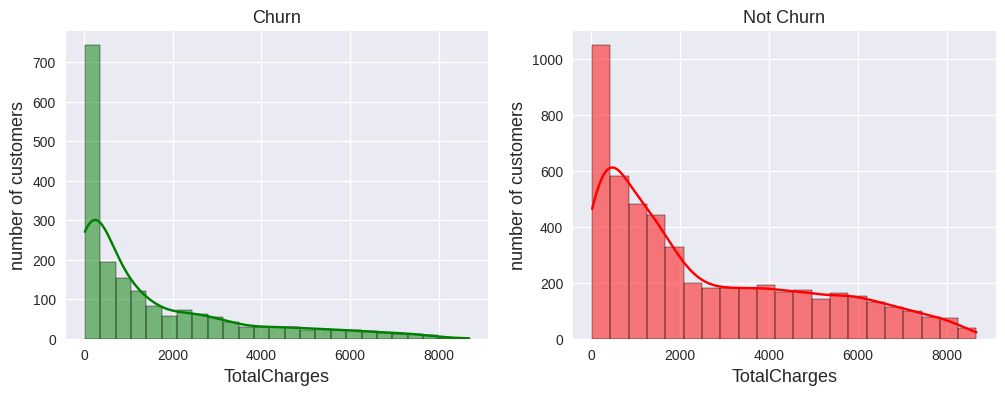

In [ ]:
numeric_plot('TotalCharges')

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
def exploring_numerical_features(data, col):
    fig = px.histogram(data, x = col, color = 'Churn', title = f'Total Churn by {col.title()}', width = 700, height = 600)
    fig.show()
exploring_numerical_features(data, 'tenure')

In [ ]:
exploring_numerical_features(data, 'MonthlyCharges')

In [ ]:
exploring_numerical_features(data, 'TotalCharges')

In [ ]:
px.scatter(data,x = 'MonthlyCharges', y = 'TotalCharges' , width = 00, height = 500)

In [ ]:
#Gender and Sitizen
gender_data = data['gender'].value_counts(normalize = True)
gender_data

Male      0.504693
Female    0.495307
Name: gender, dtype: float64

In [ ]:
px.pie(values = gender_data.values, names = gender_data.index, title = 'Gender', height = 400, width = 400)

In [ ]:
SeniorCitizen_data = data['SeniorCitizen'].value_counts(normalize = True)
SeniorCitizen_data

0    0.8376
1    0.1624
Name: SeniorCitizen, dtype: float64

In [ ]:
px.pie(values = SeniorCitizen_data.values, names = SeniorCitizen_data.index, title = 'SeniorCitizen', height = 400, width = 400)

In [ ]:
dependents_data = data['Dependents'].value_counts(normalize = True)
dependents_data

No     0.701507
Yes    0.298493
Name: Dependents, dtype: float64

In [ ]:
px.pie(values = dependents_data.values, names = dependents_data.index, title = 'Dependents', height = 400, width = 400)

In [ ]:
fig = px.bar(data['PhoneService'].value_counts(normalize = True), height = 500, width = 500, 
            color = data['PhoneService'].value_counts(normalize = True).index)
fig.update(layout_showlegend = False)
fig.update_layout(xaxis_title = 'Phone Service', yaxis_title = 'Percentage of Customers')
fig.show()

In [ ]:
fig = px.bar(data['MultipleLines'].value_counts(normalize = True), height = 500, width = 500, 
             color = data['MultipleLines'].value_counts(normalize = True).index)
fig.update(layout_showlegend = False)
fig.update_layout(xaxis_title = 'Phone Service', yaxis_title = 'Percentage of Customers')
fig.show()

In [ ]:
px.histogram(data, x = 'MultipleLines', y = 'MonthlyCharges', color = 'Churn', height = 500, width = 600)

In [ ]:
fig = px.bar(data['InternetService'].value_counts(normalize = True), height = 500, width = 500, 
             color = data['InternetService'].value_counts(normalize = True).index)
fig.update(layout_showlegend = False)
fig.update_layout(xaxis_title = 'Internet Service', yaxis_title = 'Percentage of Customers')
fig.show()

In [ ]:
def exploring_addtional_services(feature):
    fig = px.bar(data[feature].value_counts(normalize = True), height = 500, width = 500, 
                 color = data[feature].value_counts(normalize = True).index)
    
    fig.update(layout_showlegend = False)
    fig.update_layout(xaxis_title = feature, yaxis_title = 'Percentage of Customers')
    fig.show()
    
    
    

In [ ]:
def exploring_addtional_services_Churn(feature): 
    fig = px.bar(data.groupby(feature)['Churn'].mean(), height = 500, width = 600, 
                 color = data.groupby(feature)['Churn'].mean().index)
    
    fig.update(layout_showlegend = False)
    fig.update_layout(xaxis_title = feature, yaxis_title = 'Percentage of Churn')
    fig.show()

In [ ]:
exploring_addtional_services('OnlineSecurity')

In [ ]:
exploring_addtional_services('TechSupport')

In [ ]:
exploring_addtional_services('OnlineBackup')

In [ ]:
exploring_addtional_services('DeviceProtection')

In [ ]:
exploring_addtional_services('StreamingTV')

In [ ]:
exploring_addtional_services('StreamingMovies')

In [ ]:
exploring_addtional_services('Contract')

In [ ]:
# Let's see how contract affects the monthly charges:
px.histogram(data, x = 'Contract', y = 'MonthlyCharges', color = 'Churn', height = 500, width = 600)

In [ ]:
exploring_addtional_services('PaperlessBilling')

In [ ]:
exploring_addtional_services('PaymentMethod')

In [ ]:
px.histogram(data, x = 'PaymentMethod', y = 'MonthlyCharges', color = 'Churn', height = 500, width = 600)

Data Exploration

In [ ]:
train, test= train_test_split(data, test_size = 0.2, random_state = 42)

In [ ]:
def count(data, col, hue = None, ax = None):
    """
    This function draws a categorical column in count plot and pie plot.
    
    arguments \
    data: dataframe.
    col: col to visualize.
    hue: if you want to add a second variable.
    """
    # draw the count plot
    count =sns.countplot(data = data, x  = col, hue = hue ,palette = "pastel", ax = ax)
    
    # annotating
    for p in count.patches:
        count.annotate("({:.0f})".format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1), 
                       ha = "center", va = "bottom", color = "black", fontname = "monospace", fontsize = 10, weight = "bold")
    
    # labels
    labels = data[col].value_counts().sort_index().index
    count.set_xlabel(f"Categories", weight = "semibold", fontname = "monospace", fontsize = 10)
    count.set_ylabel("Count", weight = "semibold", fontname = "monospace", fontsize = 10)
    count.set_xticklabels(labels, fontsize = 10, weight = "bold")
    count.set_title(f"{col} count plot", weight = "bold", fontname = "monospace", fontsize = 15)

In [ ]:
def plot_hist(df, col, hue = None, ax = None):
    """
     This function Outputs the histogram for the column"
     
     Arguments \
     df: dataframe.
     col: the column to plot the histogram for.
     hue: (optional) to specify if there is a second variable.
     ax: (optional) to specify the axis to draw in.
    """
    plot = sns.histplot(data = df, x = col, kde= True, hue = hue, palette = "pastel", ax = ax)
        
    # titles
    plot.set_title(f"histogram plot for column {col}", fontsize = 25,weight = "bold", 
                fontname = "monospace", pad = 20)
    plot.set_xlabel(col, fontsize = 15,  weight = "semibold", fontname = "monospace")
    plot.set_ylabel("Count", fontsize = 15,  weight = "semibold", fontname = "monospace")

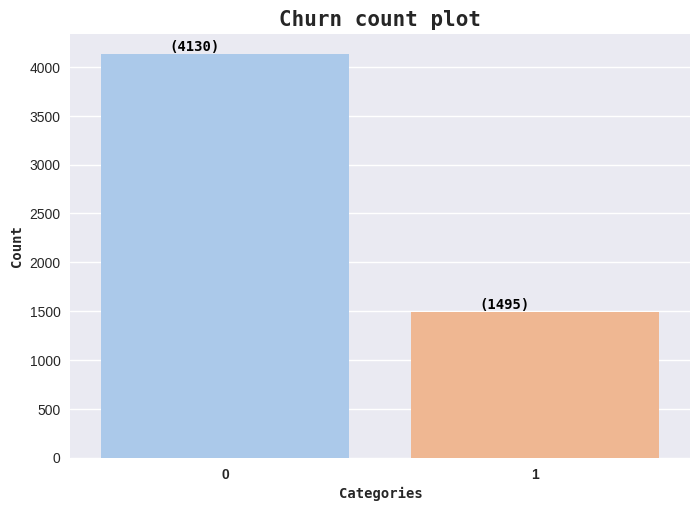

In [ ]:
#Churn Column (target)
count(train, "Churn")
plt.show()

In [ ]:
demographic = ["gender", "SeniorCitizen", "Partner", "Dependents"]
services = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
            "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
            "StreamingMovies"]
account_info = ["Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges", "tenure"]

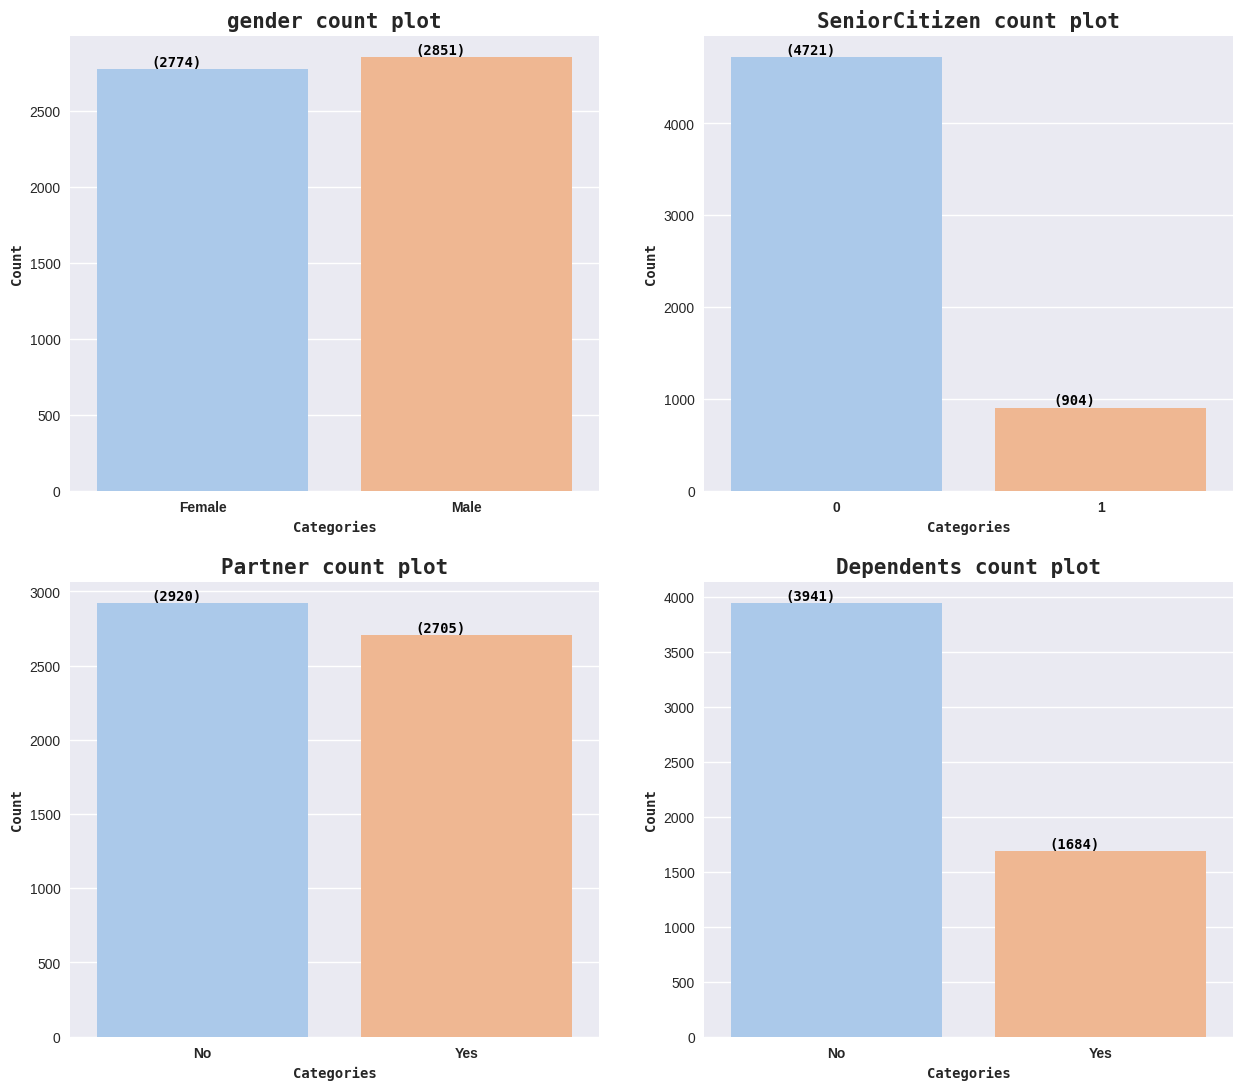

In [ ]:
import string
fig, ax = plt.subplots(2, 2, figsize = (15, 13))
for i, col in enumerate(demographic):
  count(train,col,ax = ax[i // 2, i % 2])
plt.show()

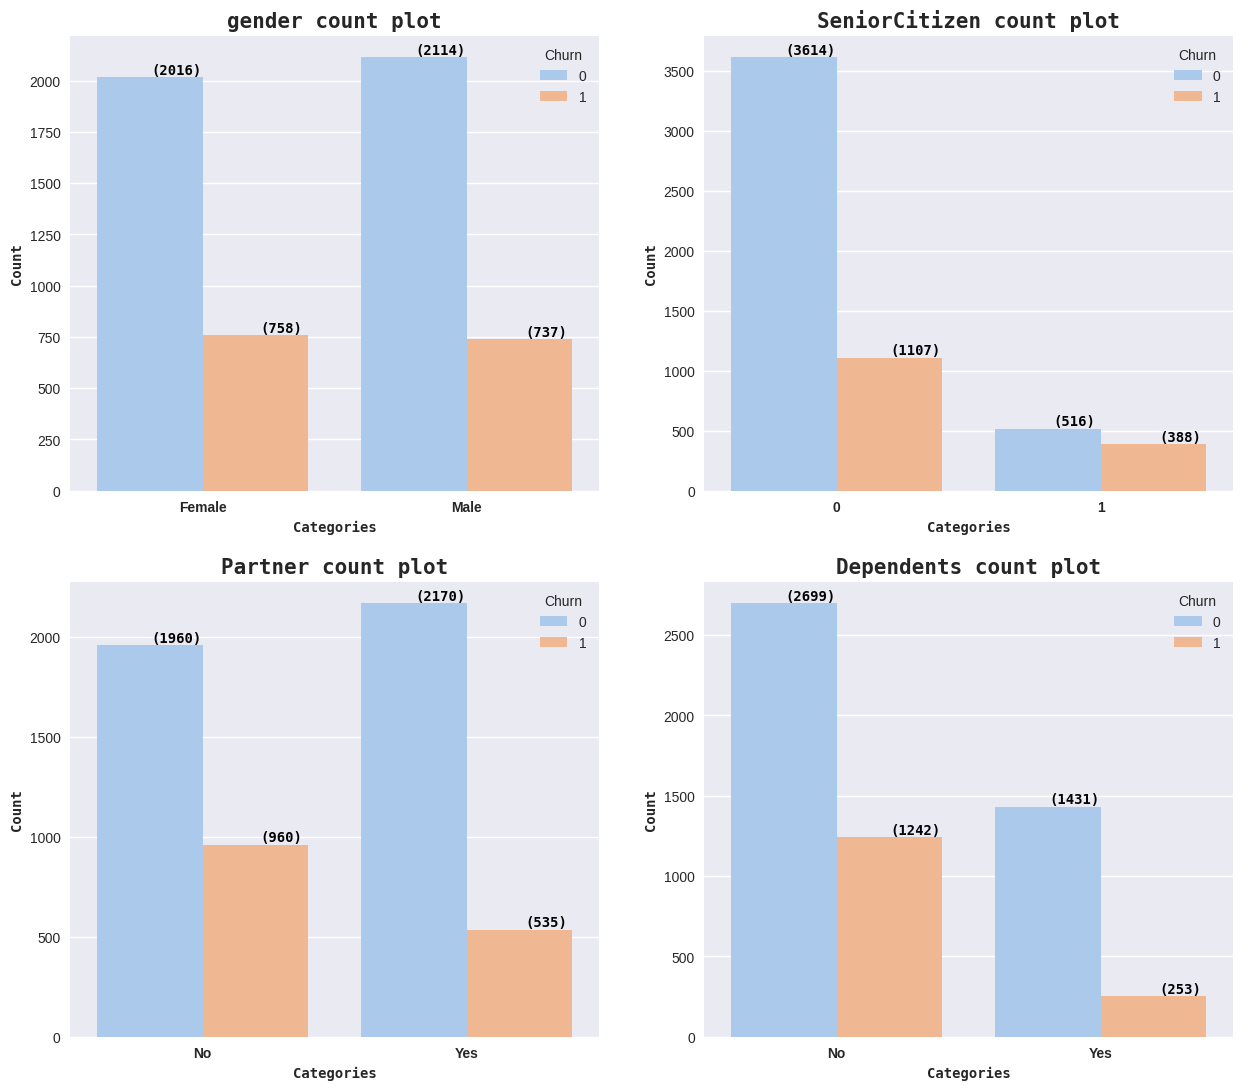

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15, 13))
for i, col in enumerate(demographic):
    count(train, col, ax = ax[i // 2, i % 2], hue = "Churn")
plt.show()

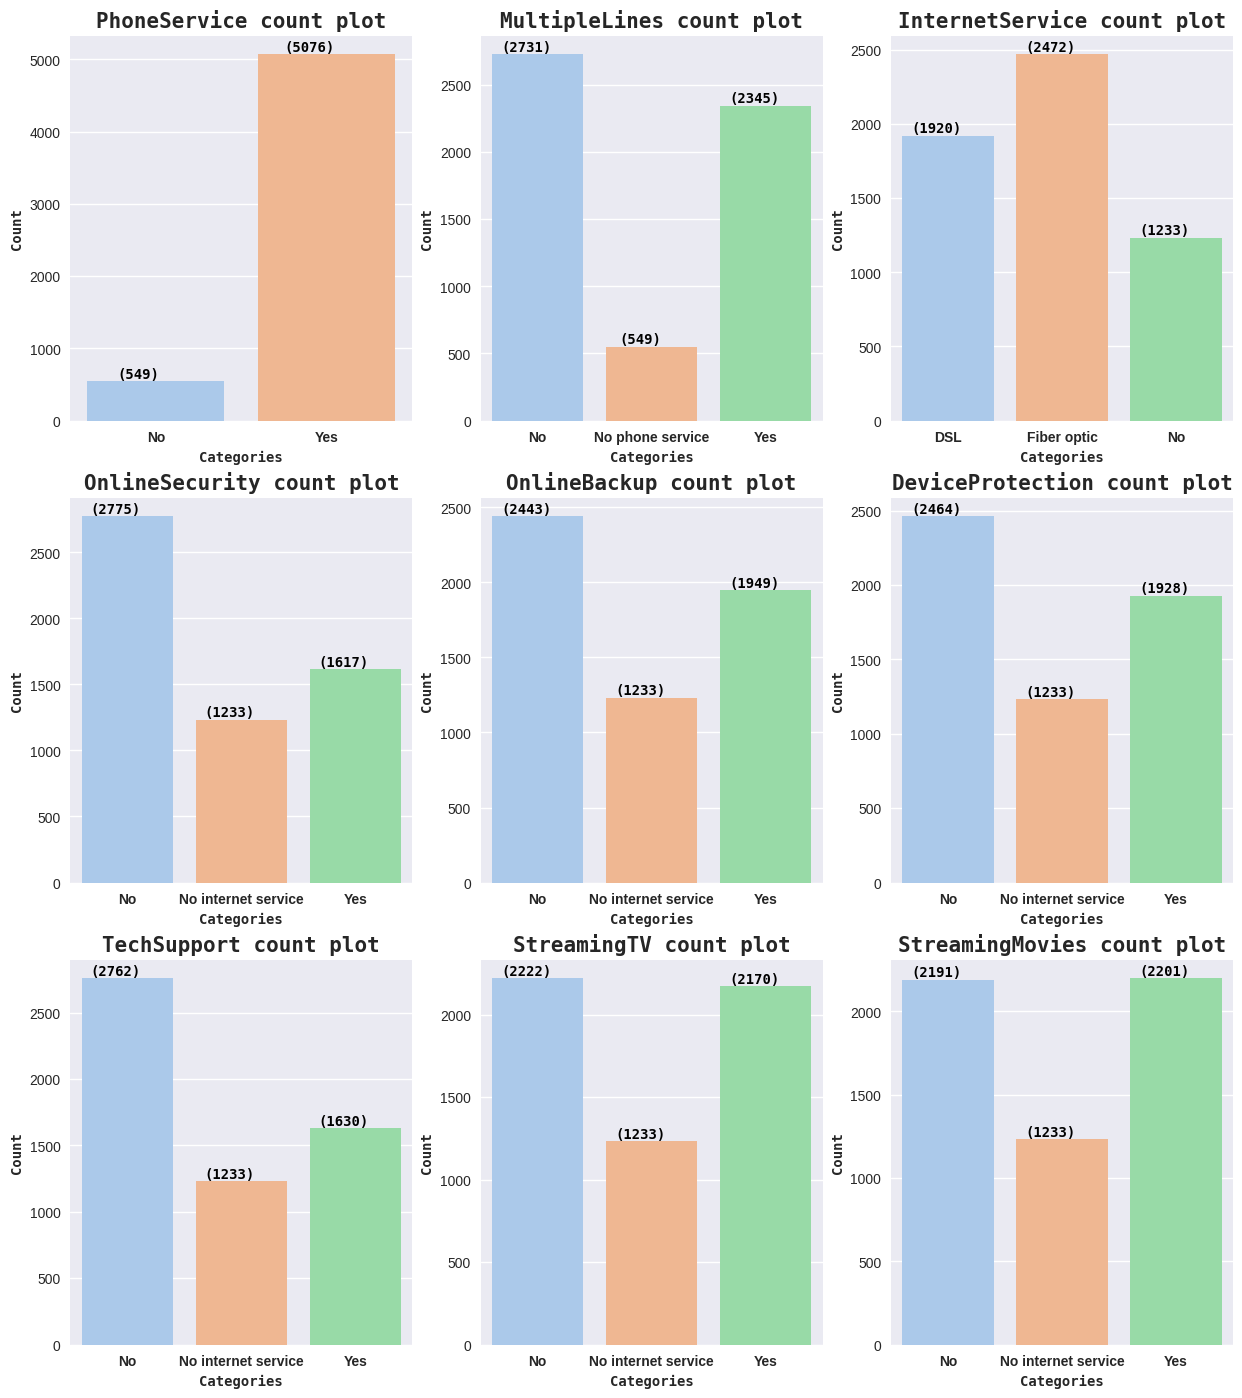

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (15, 17))
for i, col in enumerate(services):
    count(train, col, ax = ax[i // 3, i % 3])
plt.show()

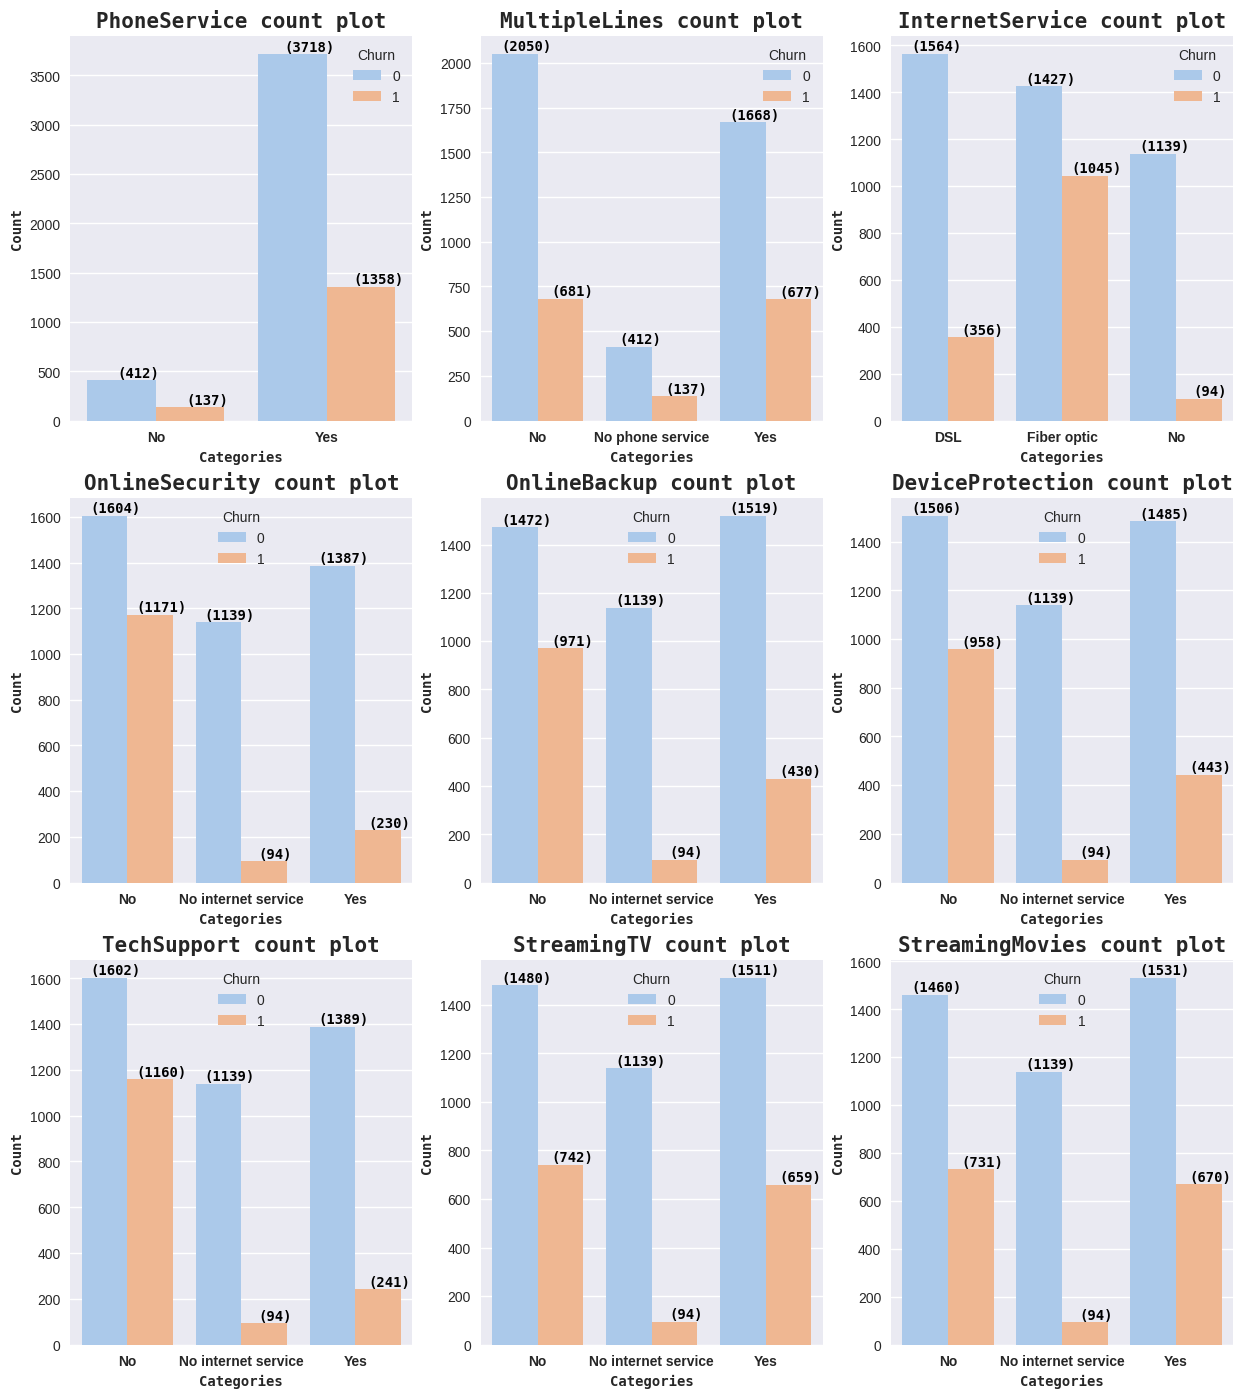

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (15, 17))
for i, col in enumerate(services):
    count(train, col, ax = ax[i // 3, i % 3], hue = "Churn")
plt.show()

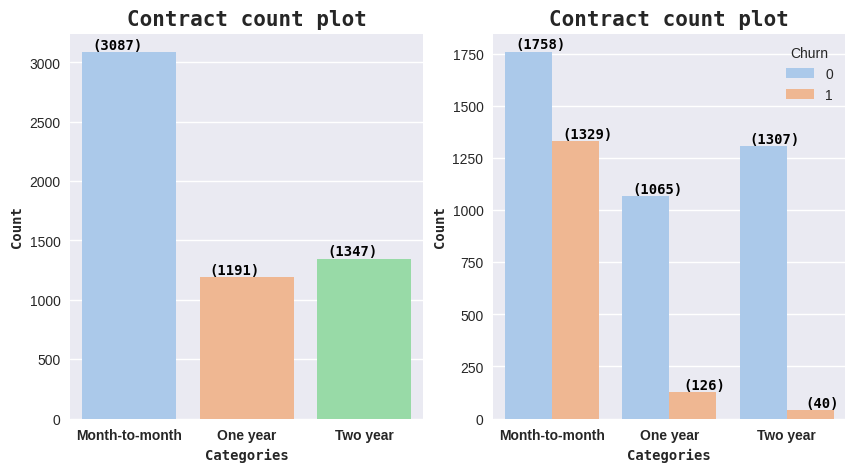

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
count(train, "Contract", ax = ax[0])
count(train, "Contract", ax = ax[1], hue = "Churn")

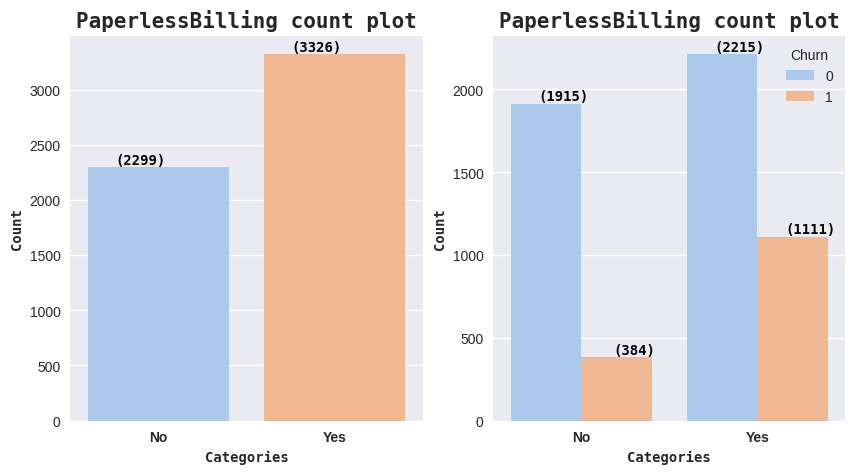

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
count(train, "PaperlessBilling", ax = ax[0])
count(train, "PaperlessBilling", ax = ax[1], hue = "Churn")

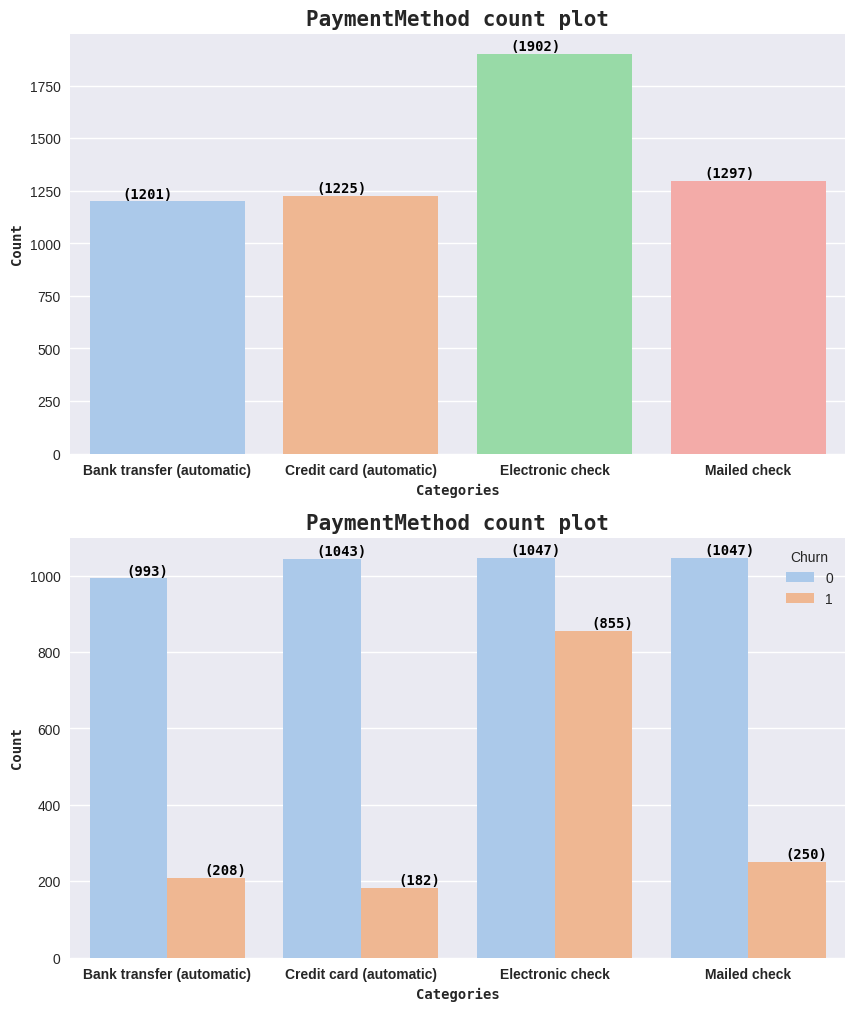

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (10, 12))
count(train, "PaymentMethod", ax = ax[0])
count(train, "PaymentMethod", ax = ax[1], hue = "Churn")

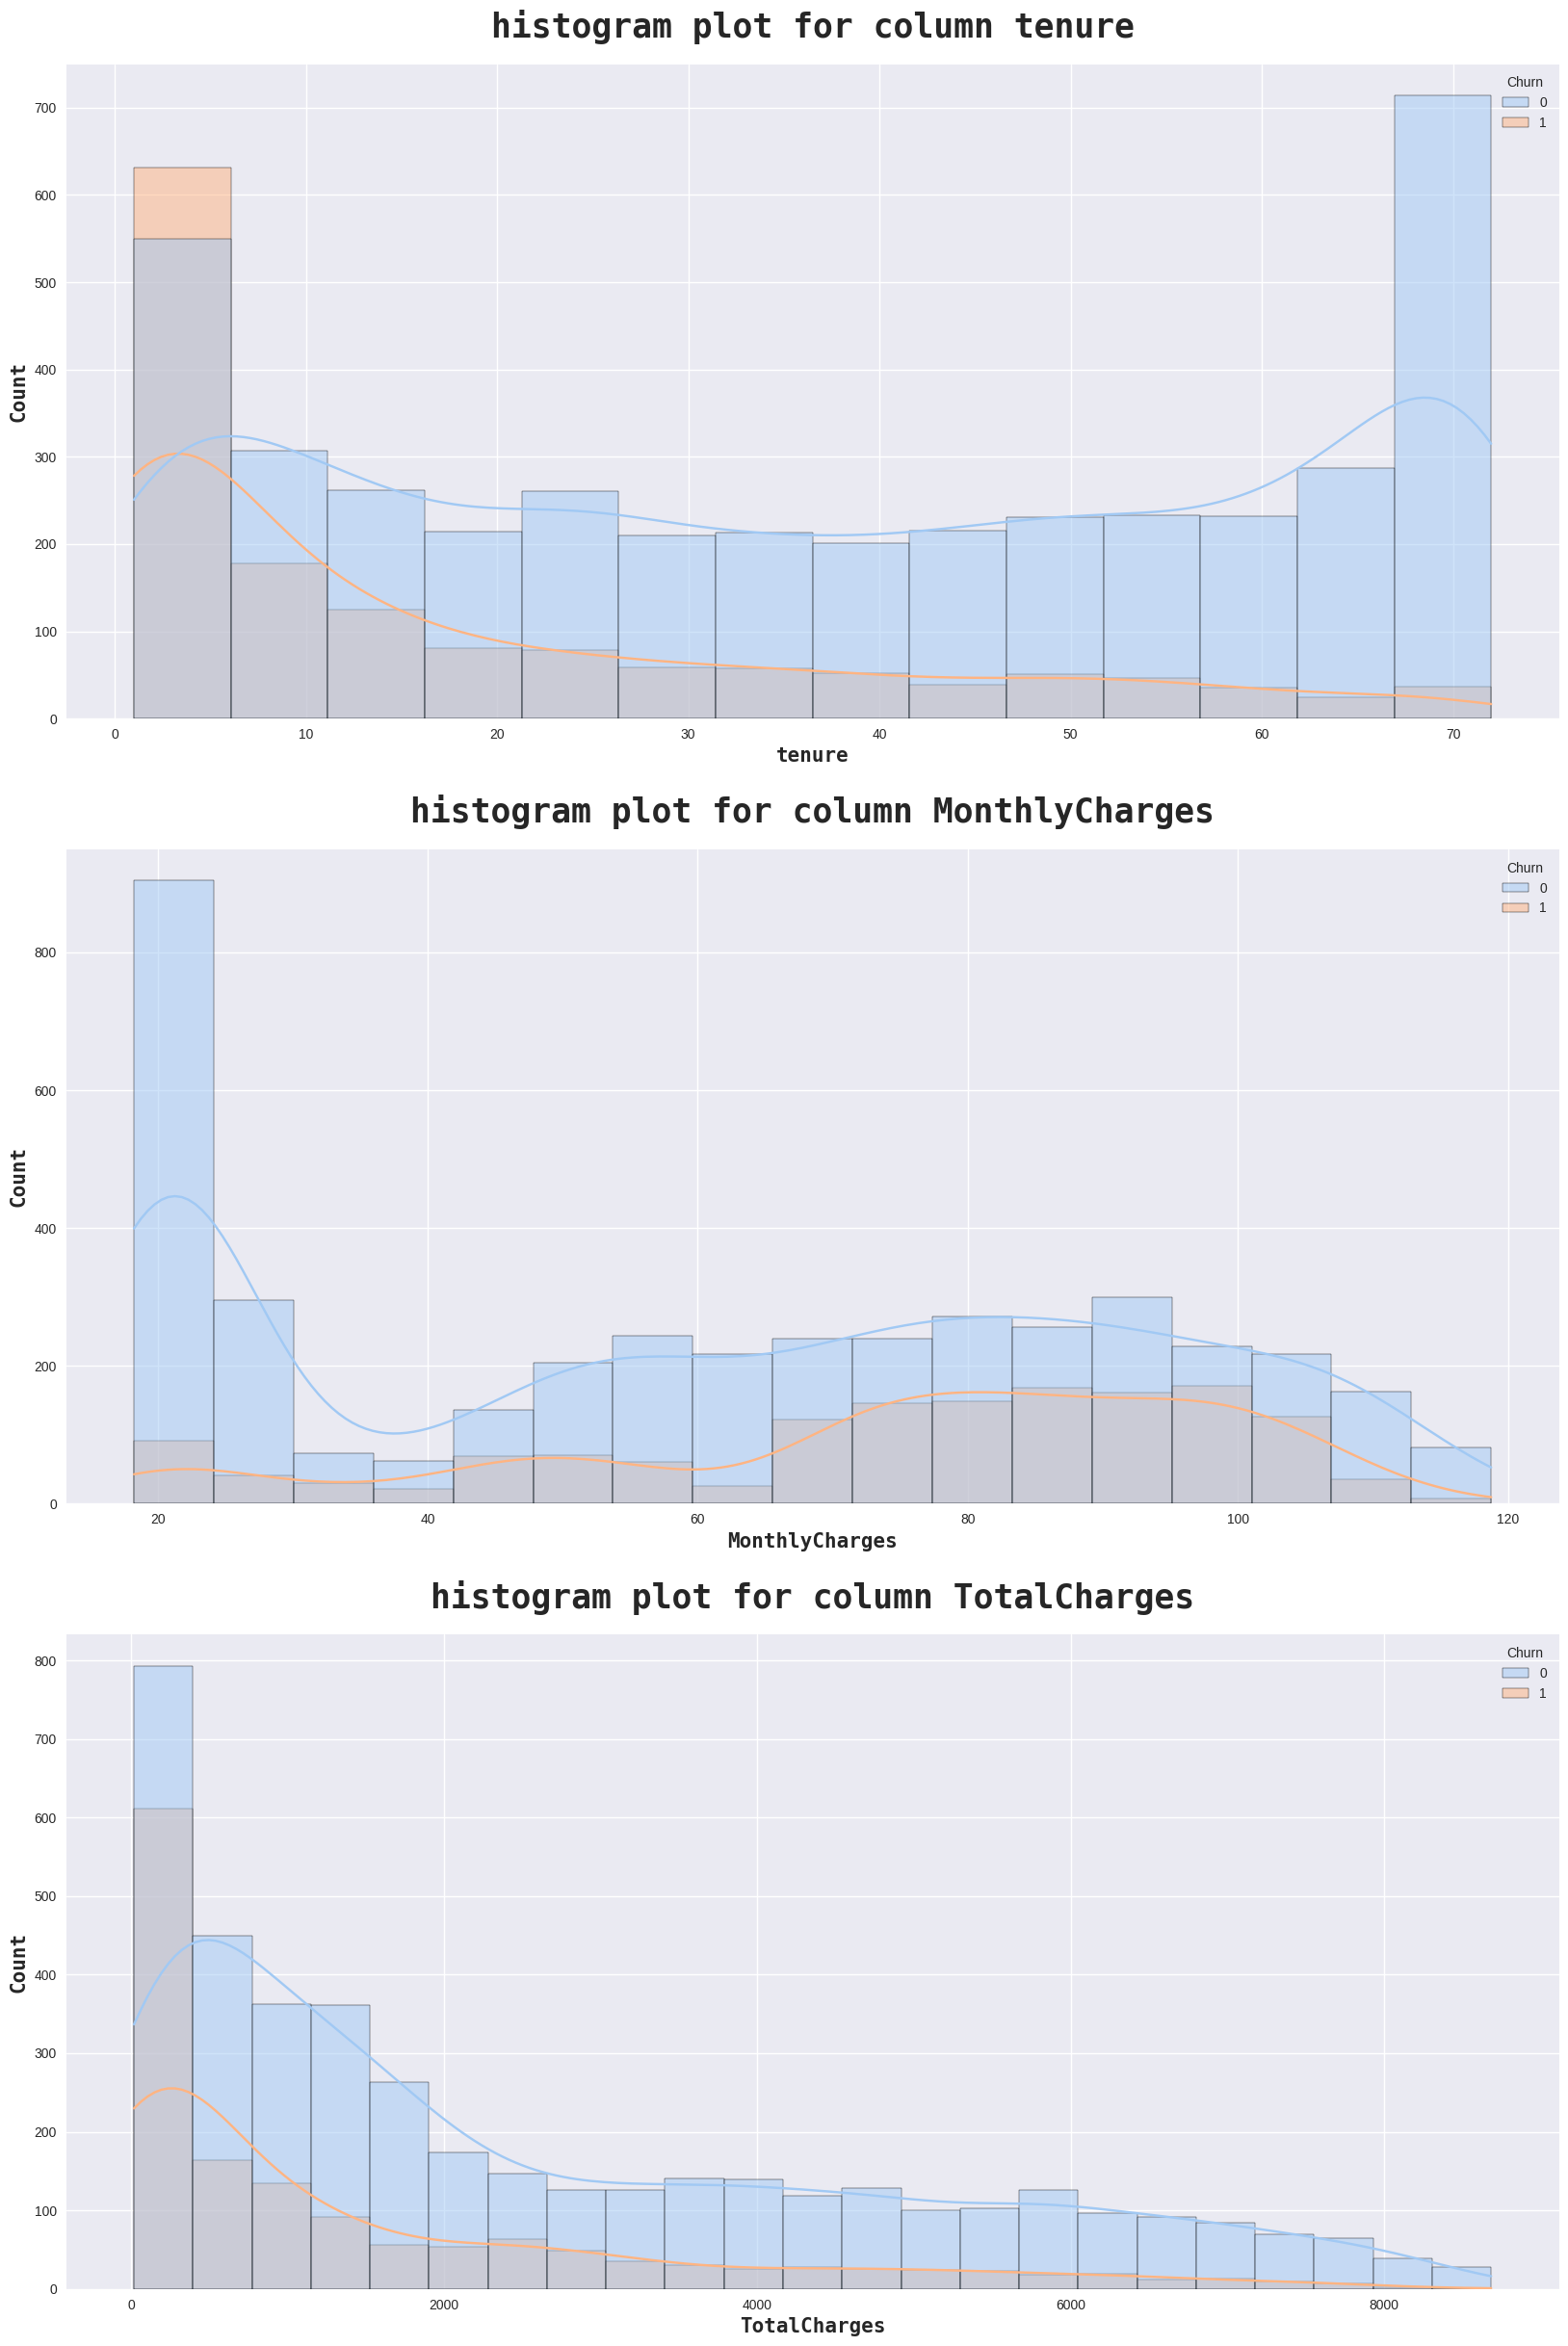

In [ ]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
fig, ax = plt.subplots(3, 1, figsize = (20, 30))
for i, col in enumerate(num_cols):
    plot_hist(train, col, ax = ax[i], hue = "Churn")
plt.show()

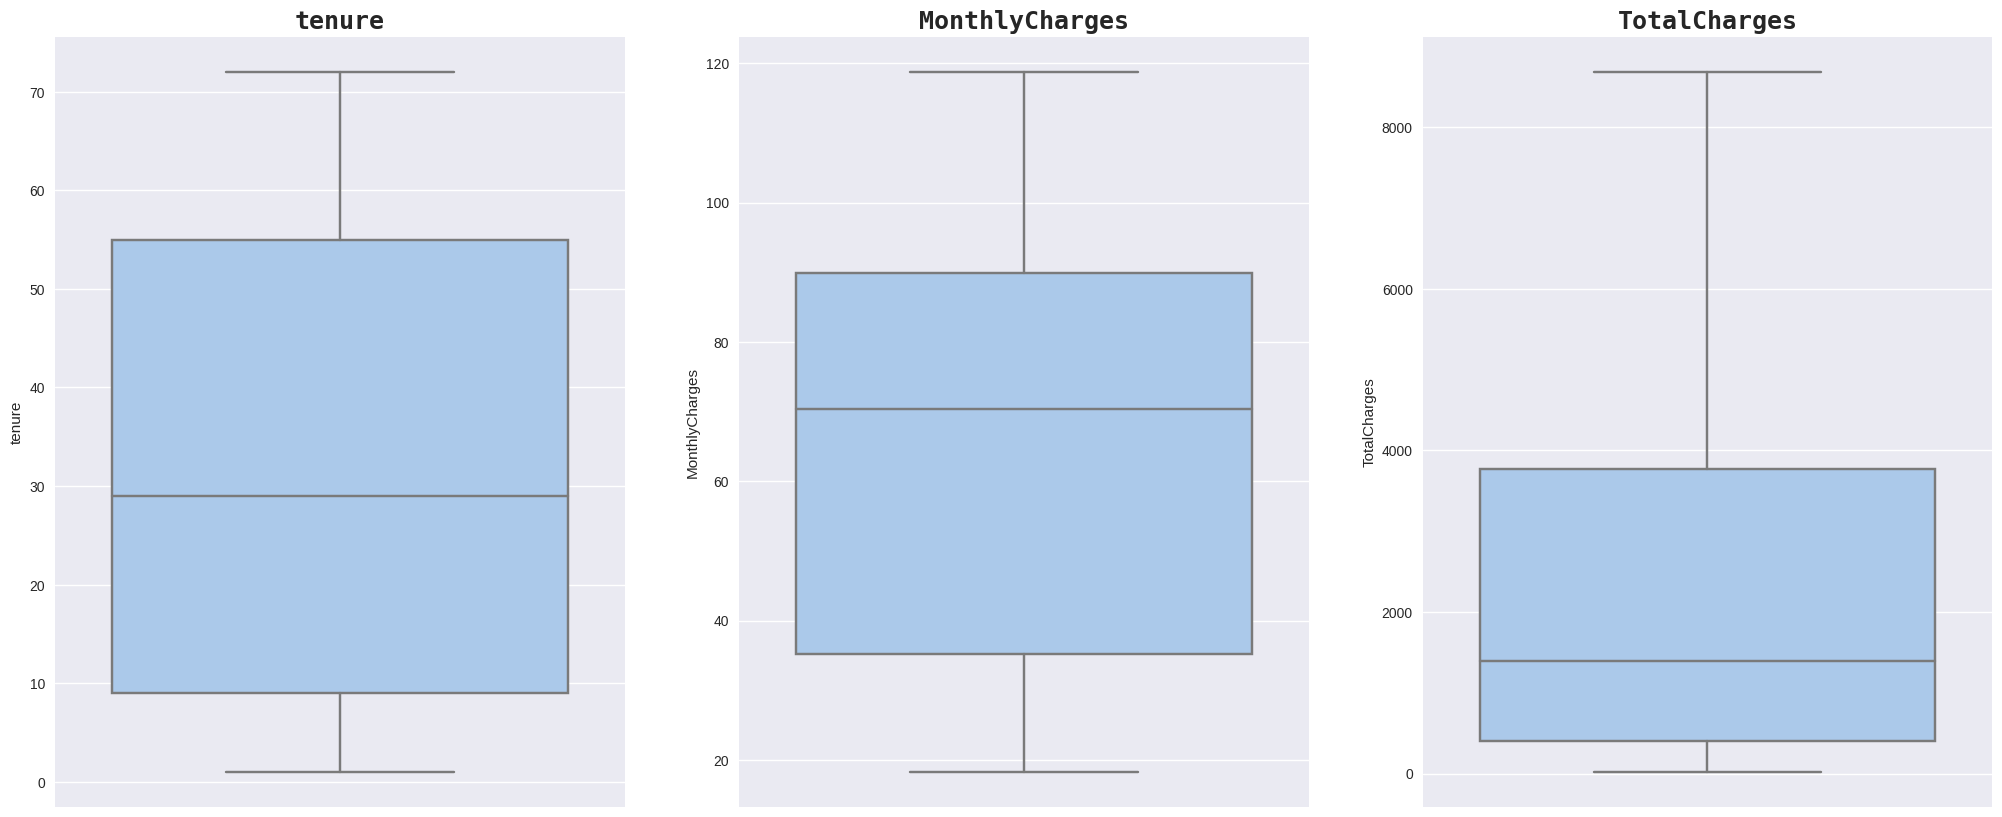

In [ ]:
# I will draw boxplots to investigate outliers

fig, ax = plt.subplots(1, 3, figsize = (25, 10))

for i, col in enumerate(num_cols):
    g = sns.boxplot(data = train, y = col, ax = ax[i], palette = "pastel")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

# **Data Preparation based on EDA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
def datapreparation(filepath):
    
    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace = True, axis = 1)
    
    df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    df.TotalCharges.fillna(0, inplace = True)
    df.TotalCharges = df.TotalCharges.astype(float)
    
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)
   
    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
    
    return df

In [ ]:
df = datapreparation(filepath = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv.xls")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,0,1,0


In [ ]:
df.isnull().any().any()

False

# **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=111, stratify = df.Churn)


In [ ]:
x = df.columns[df.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]

In [ ]:
#function for model fitting
def churn_prediction(algo, training_x, training_y, testing_x, testing_y, cols, cf = 'coefficients'):
    algo.fit(training_x,training_y)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)[:,1]
    
    #coeffs
    if cf == "coefficients":
        coefficients = pd.DataFrame(algo.coef_.ravel())
    elif cf == "features":
        coefficients = pd.DataFrame(algo.feature_importances_)
        
    column_df = pd.DataFrame(cols)
    coef_sumry = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algo)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,probabilities) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities)
    
    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    plt.subplot(212)
    sns.barplot(x = coef_sumry["features"] ,y = coef_sumry["coefficients"])
    plt.title('Feature Importances')
    plt.xticks(rotation="vertical")
    
    plt.show()

# Hyperparameters Tuning
## Grid 1: Selecting class weight and estimators

In [ ]:
param_grid1 = {'max_features':['auto', 'sqrt', 'log2', None],
          'n_estimators':[300, 500, 700, 900, 1100, 1300]
         }

rf_model = RandomForestClassifier()
grid1 = GridSearchCV(estimator=rf_model, param_grid=param_grid1, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid1.fit(train_x, train_y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [300, 500, 700, 900, 1100, 1300]},
             scoring='f1', verbose=1)

In [ ]:
grid1.best_estimator_

RandomForestClassifier(max_features='log2', n_estimators=900)

<Axes: xlabel='param_max_features', ylabel='param_n_estimators'>

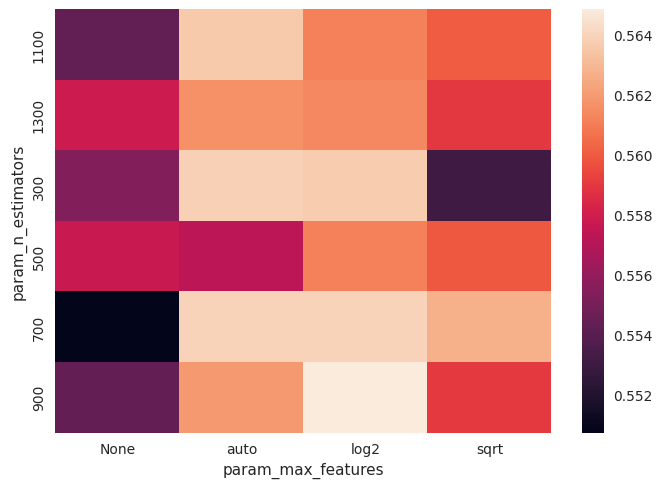

In [ ]:
dt = pd.DataFrame(grid1.cv_results_)
dt.param_max_features = dt.param_max_features.astype(str)
dt.param_n_estimators = dt.param_n_estimators.astype(str)

table = pd.pivot_table(dt, values='mean_test_score', index='param_n_estimators', 
                       columns='param_max_features')
     
sns.heatmap(table)

In [ ]:
grid1.best_score_
# best score

0.5648596675812912

# **Grid 2: Selecting max depth and split criterion**


In [ ]:
param_grid2 = {'max_features':['auto'],
          'n_estimators':[1000, 1100, 1200],
           'criterion': ['entropy', 'gini'],    
          'max_depth': [7, 9, 11, 13, 15, None],
         }

rf_model = RandomForestClassifier()
grid2 = GridSearchCV(estimator=rf_model, param_grid=param_grid2, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid2.fit(train_x, train_y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [7, 9, 11, 13, 15, None],
                         'max_features': ['auto'],
                         'n_estimators': [1000, 1100, 1200]},
             scoring='f1', verbose=1)

In [ ]:
grid2.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='auto',
                       n_estimators=1000)

<Axes: xlabel='param_criterion', ylabel='param_max_depth'>

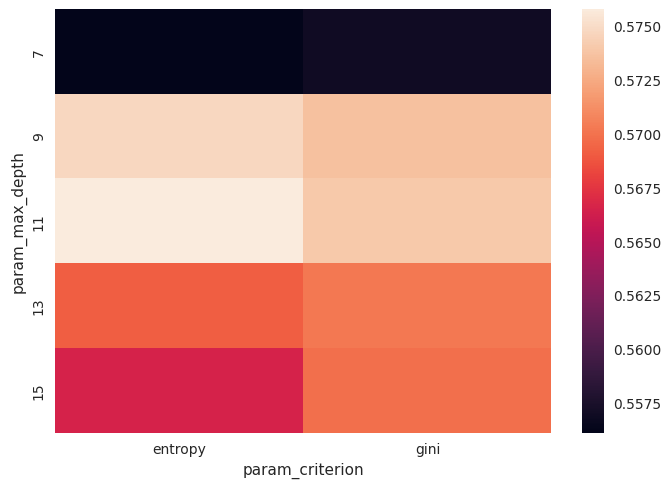

In [ ]:
dt = pd.DataFrame(grid2.cv_results_)

table = pd.pivot_table(dt, values='mean_test_score', index='param_max_depth', 
                       columns='param_criterion')
     
sns.heatmap(table)

<Axes: xlabel='param_n_estimators', ylabel='param_max_depth'>

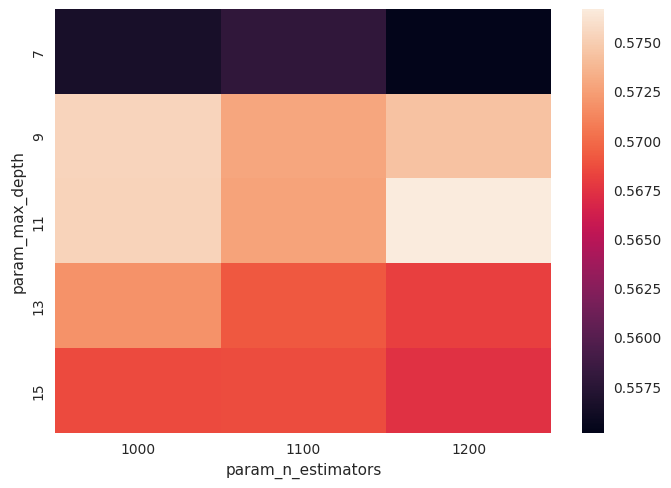

In [ ]:
table = pd.pivot_table(dt, values='mean_test_score', index='param_max_depth', 
                       columns='param_n_estimators')
     
sns.heatmap(table)

In [ ]:
grid2.best_score_
#best score

0.5774165274245854

Checking if other depth and estimator value results better

In [ ]:
param_grid2_2 = {'max_features':['auto'],
          'n_estimators':[950, 1000, 1050],
           'criterion': ['entropy'],    
          'max_depth': [10, 11, 12],
         }

rf_model = RandomForestClassifier()
grid2_2 = GridSearchCV(estimator=rf_model, param_grid=param_grid2_2, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid2_2.fit(train_x, train_y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 11, 12],
                         'max_features': ['auto'],
                         'n_estimators': [950, 1000, 1050]},
             scoring='f1', verbose=1)

In [ ]:
grid2_2.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='auto',
                       n_estimators=1050)

In [ ]:
grid2_2.best_score_
#best score

0.5790066370471417

# **Grid 3: Selecting minimum samples leaf and split**

In [ ]:
param_grid3 = {'max_features':['auto'],
          'n_estimators':[1000],
           'criterion': ['entropy'],    
          'max_depth': [10],
          'min_samples_leaf': [1, 3, 5, 7],
          'min_samples_split': [2, 4, 6, 8]
         }

rf_model = RandomForestClassifier()
grid3 = GridSearchCV(estimator=rf_model, param_grid=param_grid3, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid3.fit(train_x, train_y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [1000]},
             scoring='f1', verbose=1)

In [ ]:
grid3.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=5, min_samples_split=6,
                       n_estimators=1000)

<Axes: xlabel='param_min_samples_split', ylabel='param_min_samples_leaf'>

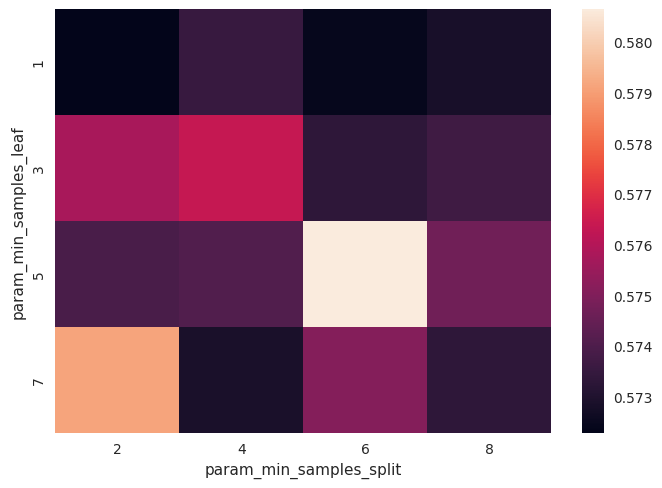

In [ ]:
dt = pd.DataFrame(grid3.cv_results_)

table = pd.pivot_table(dt, values='mean_test_score', index='param_min_samples_leaf', 
                       columns='param_min_samples_split')
     
sns.heatmap(table)

In [ ]:
grid3.best_score_
#best score

0.580647577359514

# **Grid 4: Selecting class weight**

In [ ]:
param_grid4 = {'class_weight':[{0:1, 1:1}, {0:1, 1:2}, {0:1, 1:3}],
            'max_features':['auto'],
          'n_estimators':[1000],
           'criterion': ['entropy'],    
          'max_depth': [10],
          'min_samples_leaf': [1],
          'min_samples_split': [8]
         }

rf_model = RandomForestClassifier()
grid4 = GridSearchCV(estimator=rf_model, param_grid=param_grid4, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid4.fit(train_x, train_y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}],
                         'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [8], 'n_estimators': [1000]},
             scoring='f1', verbose=1)

In [ ]:
grid4.best_estimator_


RandomForestClassifier(class_weight={0: 1, 1: 3}, criterion='entropy',
                       max_depth=10, max_features='auto', min_samples_split=8,
                       n_estimators=1000)

<Axes: ylabel='param_class_weight'>

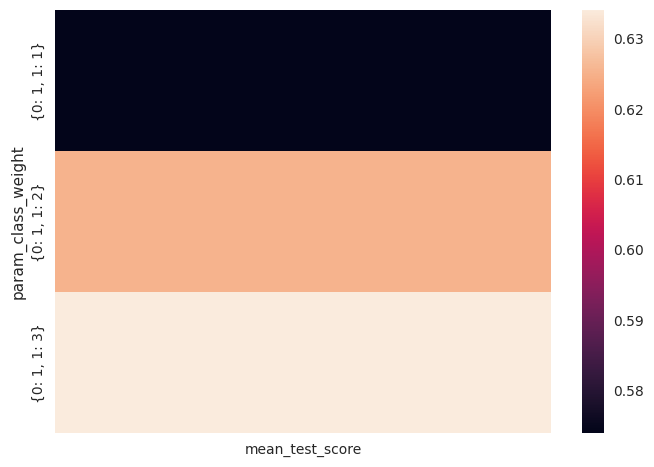

In [ ]:
dt = pd.DataFrame(grid4.cv_results_)
dt.param_class_weight = dt.param_class_weight.astype(str)
table = pd.pivot_table(dt, values='mean_test_score', index='param_class_weight')
     
sns.heatmap(table)

In [ ]:
grid4.best_score_
#best score

0.6340874048900246

# **Final Model**

In [ ]:
!pip install sklearn



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=33b74ce2ddc154b199e748d6d30d5bbd8a957d6557df381ec8fa6dd3005f1953
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


RandomForestClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=10, max_features='auto', min_samples_split=8,
                       n_estimators=1000)

 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1035
           1       0.59      0.66      0.62       374

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.79      0.79      1409

Accuracy   Score :  0.7877927608232789
Area under curve :  0.8485003487561034 



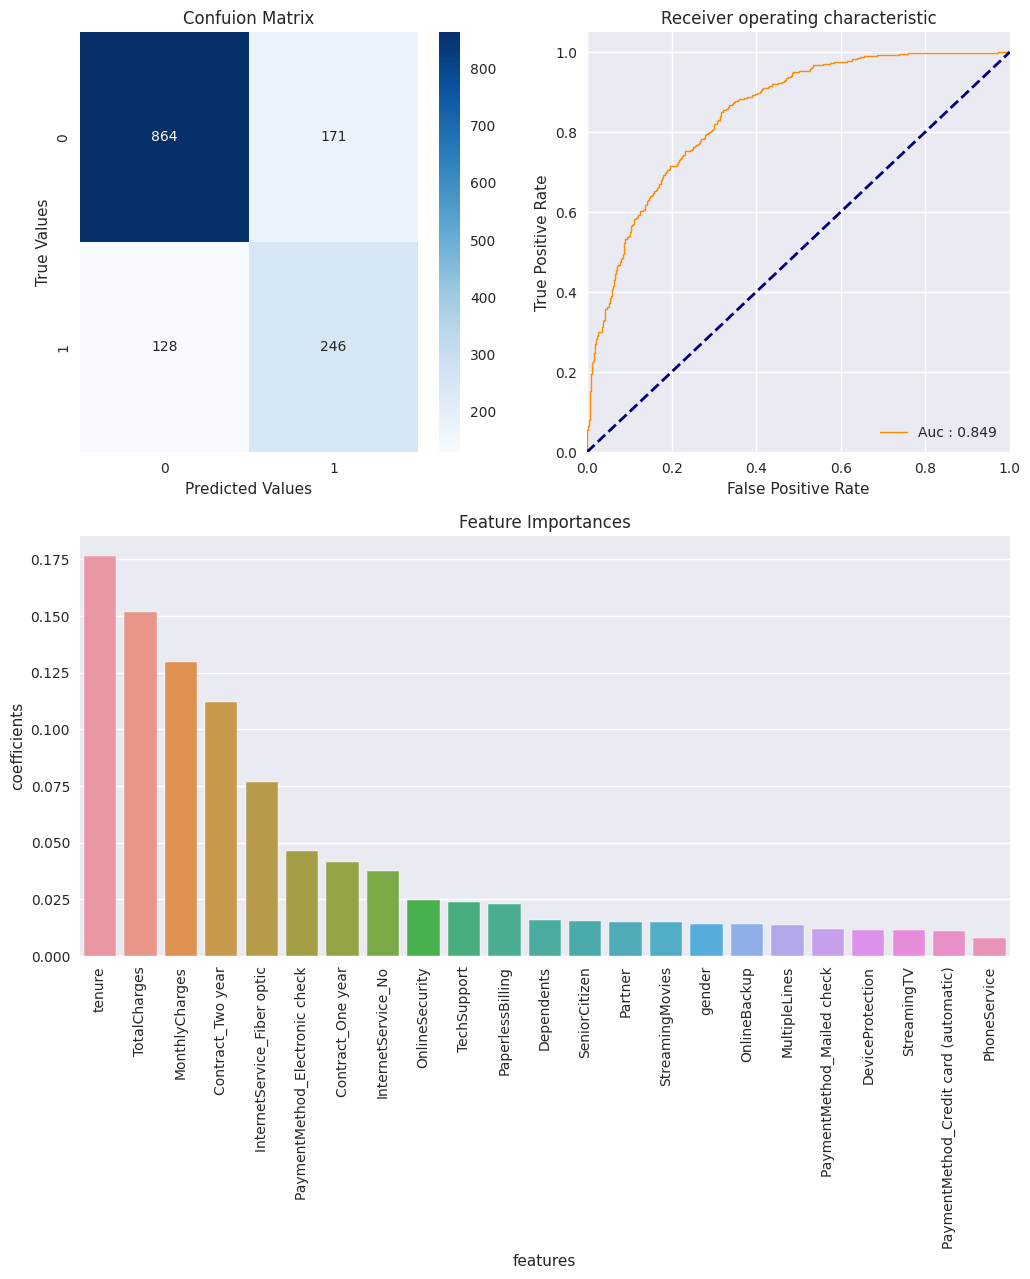

In [ ]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 2},
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
churn_prediction(model, train_x, train_y, test_x, test_y, x,"features")

In [ ]:
train_scores = cross_val_score(model, train_x, train_y, cv = 5, scoring='f1')
train_scores
np.mean(train_scores)

0.6206543918062475

# **save model**

In [ ]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

# GAUGE

In [ ]:
from matplotlib.patches import Circle, Wedge, Rectangle
#The start and end angles determine the angular span of the sector, which can be used to represent different categories or levels on the gauge. 
def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation
    #a list of labels for the categories or levels of the gauge, in descending order
    #a list of colors corresponding to the categories or levels of the gauge, also in descending order.
    #a value between 0 and 1 representing the value or probability to be indicated by the arrow on the gauge.
    

def gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
          colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], Probability=1, fname=False): 
    
    N = len(labels)
    colors = colors[::-1]

    """
    begins the plotting
    """
    #The function first creates a subplot using matplotlib's "subplots" function.
    #it defines the sectors and arcs of the gauge using Wedge patches, where the colors and angles are determined based on the provided labels and color
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(4)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    #The Wedge patches can be added to the plot using the "add_patch" function, which allows them to be rendered as part of the final gauge plot.
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """
    #The labels are added as text to the plot at appropriate positions using the "text" function
    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    # and the bottom banner and title are added using Rectangle patches and text function.
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, 'Churn Probability ' + np.round(Probability,2).astype(str), horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    #the arrow is plotted using the "arrow" function, with the position of the arrow determined based on the "Probability" parameter.
    #Two circles are added as the arrowhead and arrow base using Circle patches.
    pos = (1-Probability)*180
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    #he plot's frame and ticks are removed, and the axes are set to equal and tight. If a file name is provided,
    #the generated gauge plot is saved as an image file with the specified file name using the "savefig" function.
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    #f namean optional parameter to specify a file name to save the generated gauge plot as an image file.
    if fname:
        fig.savefig(fname, dpi=200)

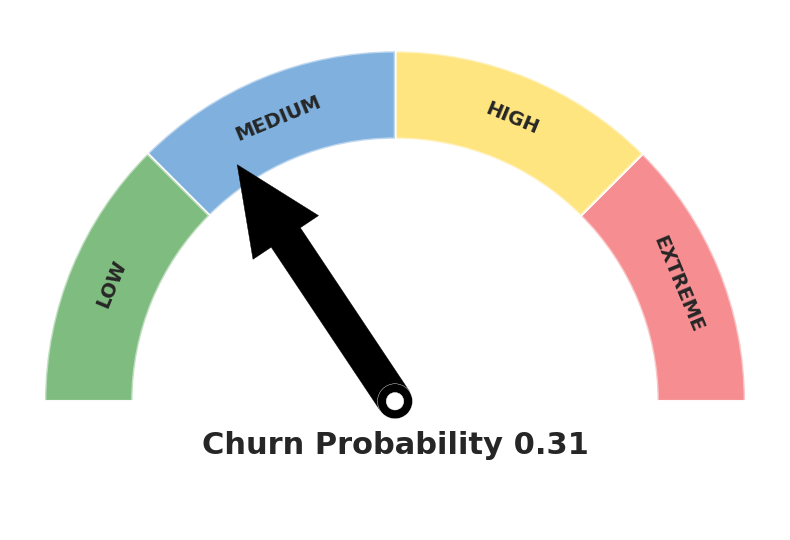

In [ ]:
gauge(Probability=model.predict_proba(test_x.iloc[0:1])[0,1])

Final features

In [ ]:
test_x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
#start

# **XGB**

In [ ]:
import xgboost as xgb
from xgboost import *
import sklearn as skl
from sklearn import *
from sklearn.preprocessing import LabelEncoder

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(train_x, train_y)
xgb_accuracy = round(xgb_model.score(train_x, train_y) * 100, 2)

print("The accuracy of the XGBoost Classifier is: ",xgb_accuracy) # around 97.78%



The accuracy of the XGBoost Classifier is:  83.87


In [ ]:
# Check our classification model to see where exactly our model fails
y_pred = xgb_model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1035
           1       0.68      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [ ]:
# Visualize Gradient Boosting Decision Tree with XGBoost
from xgboost import plot_tree
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(100,100))
plot_tree(xgb_model, ax=ax)p[]
     

SyntaxError: ignored

In [ ]:
# Convert the raw score for class 1 (leaf value) to a probability score by using the logistic function
leaf_value = -0.155761108 # <--- replace this value to find other probabilities
1/(1+np.exp(leaf_value)) 

0.5388617383398366

### Feature Engineering

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

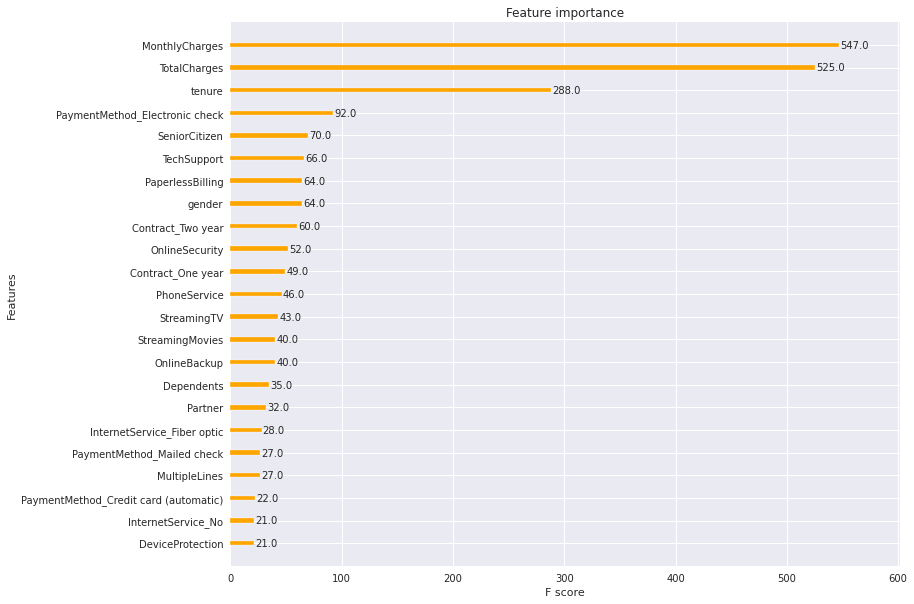

In [ ]:
# Find the most important features
fig, ax = plt.subplots(figsize=(12,10))
plot_importance(xgb_model, ax=ax, color = "orange")
     

# CUSTOMER SURVIVAL ANALYSIS

In [ ]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 KB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 KB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=32d015e00fa07259e680fd44301a7ac1834f29d79d83b9ac362e72f3a7393369
  Stored in directory: /root/.cache/pip/wheels/a8/03/64/8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as st
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Lifelines is a survival analysis package
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test   
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

PREP

In [ ]:
df.Churn = labelencoder.fit_transform(df.Churn)
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
eventvar = df['Churn']
timevar = df['tenure']

dummy variable creation

In [ ]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling']

survivaldata = pd.get_dummies(df, columns = categorical, drop_first= True)
survivaldata.head()

,tenure,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_1,SeniorCitizen_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_1,OnlineSecurity_1,OnlineBackup_1,DeviceProtection_1,TechSupport_1,StreamingTV_1,StreamingMovies_1,PaperlessBilling_1
0,1,29.85,29.85,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1
1,34,56.95,1889.50,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0
2,2,53.85,108.15,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1
3,45,42.30,1840.75,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
4,2,70.70,151.65,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1


We need to drop variables such as customerID, tenure, Churn as they are not needed in survival data. Also, we need to add constant for survival analysis.

In [ ]:
survivaldata.drop(['tenure', 'Churn'], axis = 1, inplace= True)
survivaldata = st.add_constant(survivaldata, prepend=False)
survivaldata.head()

,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_1,SeniorCitizen_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_1,OnlineSecurity_1,OnlineBackup_1,DeviceProtection_1,TechSupport_1,StreamingTV_1,StreamingMovies_1,PaperlessBilling_1,const
0,29.85,29.85,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1.0
1,56.95,1889.50,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1.0
2,53.85,108.15,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1.0
3,42.30,1840.75,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1.0
4,70.70,151.65,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1.0


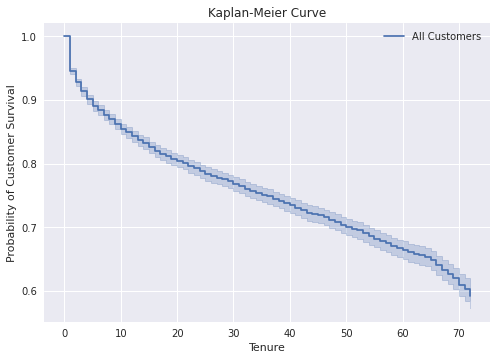

In [ ]:
#Create a KaplanMeier object, imported from lifelines
kmf = KaplanMeierFitter()
#Calculate the K-M curve for all groups
kmf.fit(timevar,event_observed = eventvar,label = "All Customers")
#Plot the curve and assign labels
kmf.plot()
plt.ylabel('Probability of Customer Survival')
plt.xlabel('Tenure')
plt.title('Kaplan-Meier Curve');

GENDER

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.53 0.47      1.09

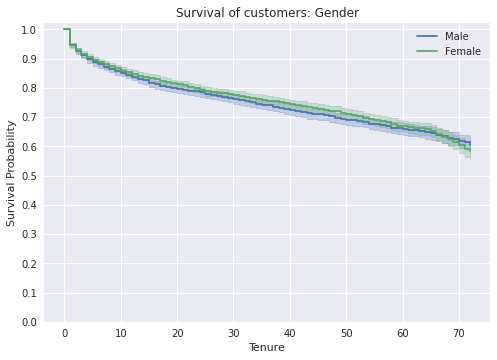

In [ ]:
male = (survivaldata['gender_1'] == 1)
female = (survivaldata['gender_1'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[male],event_observed = eventvar[male],label = "Male")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[female],event_observed = eventvar[female],label = "Female")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Gender')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[male], timevar[female], event_observed_A=eventvar[male], event_observed_B=eventvar[female])
groups.print_summary()

Senior Citizen

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         109.49 <0.005     82.71

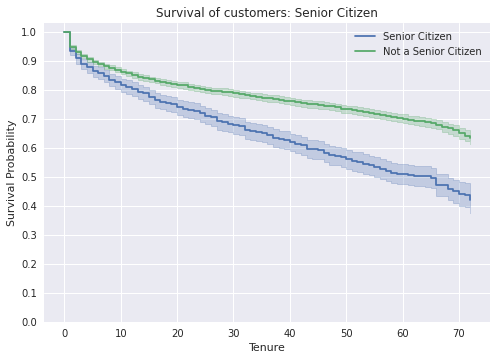

In [ ]:
SeniorCitizen = (survivaldata['SeniorCitizen_1'] == 1)
no_SeniorCitizen = (survivaldata['SeniorCitizen_1'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[SeniorCitizen],event_observed = eventvar[SeniorCitizen],label = "Senior Citizen")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_SeniorCitizen],event_observed = eventvar[no_SeniorCitizen],label = "Not a Senior Citizen")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Senior Citizen')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[SeniorCitizen], timevar[no_SeniorCitizen], event_observed_A=eventvar[SeniorCitizen], event_observed_B=eventvar[no_SeniorCitizen])
groups.print_summary()

PARTNER

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         423.54 <0.005    310.21

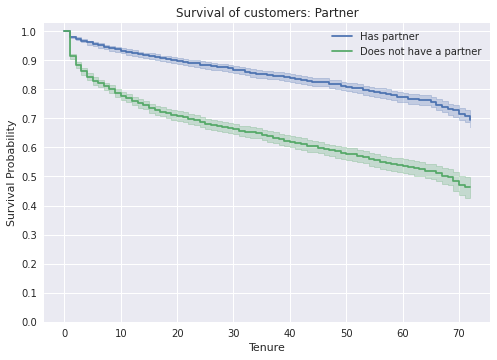

In [ ]:
partner = (survivaldata['Partner_1'] == 1)
no_partner = (survivaldata['Partner_1'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[partner],event_observed = eventvar[partner],label = "Has partner")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_partner],event_observed = eventvar[no_partner],label = "Does not have a partner")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Partner')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[partner], timevar[no_partner], event_observed_A=eventvar[partner], event_observed_B=eventvar[no_partner])
groups.print_summary()

dependent

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         232.70 <0.005    172.12

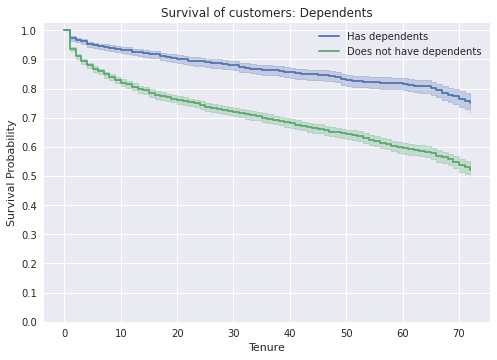

In [ ]:
Dependents = (survivaldata['Dependents_1'] == 1)
no_Dependents = (survivaldata['Dependents_1'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[Dependents],event_observed = eventvar[Dependents],label = "Has dependents")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_Dependents],event_observed = eventvar[no_Dependents],label = "Does not have dependents")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Dependents')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[Dependents], timevar[no_Dependents], event_observed_A=eventvar[Dependents], event_observed_B=eventvar[no_Dependents])
groups.print_summary()

PHONE SERVICE

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.43 0.51      0.97

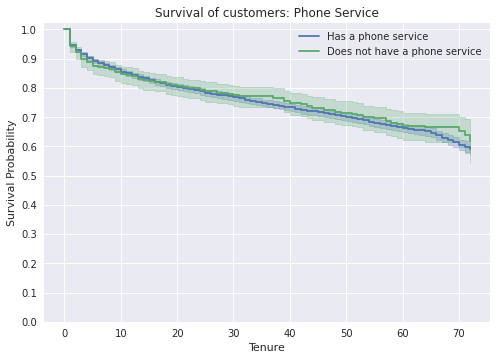

In [ ]:
PhoneService = (survivaldata['PhoneService_1'] == 1)
no_PhoneService = (survivaldata['PhoneService_1'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[PhoneService],event_observed = eventvar[PhoneService],label = "Has a phone service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_PhoneService],event_observed = eventvar[no_PhoneService],label = "Does not have a phone service")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Phone Service')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[PhoneService], timevar[no_PhoneService], event_observed_A=eventvar[PhoneService], event_observed_B=eventvar[no_PhoneService])
groups.print_summary()

MULTIPLE LINES

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          24.85 <0.005     20.62

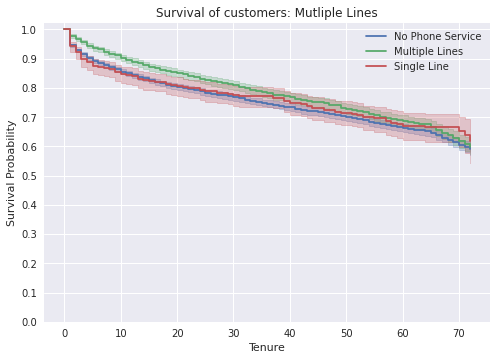

In [ ]:
no_phone = (survivaldata['PhoneService_1'] == 1)
multiLines = (survivaldata['MultipleLines_1'] == 1)
no_multiLines = ((survivaldata['MultipleLines_1'] == 0) & (survivaldata['PhoneService_1'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_phone],event_observed = eventvar[no_phone],label = "No Phone Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[multiLines],event_observed = eventvar[multiLines],label = "Multiple Lines")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_multiLines],event_observed = eventvar[no_multiLines],label = "Single Line")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Mutliple Lines')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['MultipleLines'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

Internet Service

KeyError: ignored

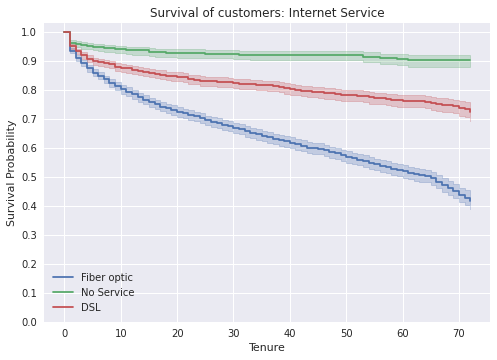

In [ ]:
Fiber_optic = (survivaldata['InternetService_Fiber optic'] == 1)
No_Service = (survivaldata['InternetService_No'] == 1)
DSL = ((survivaldata['InternetService_Fiber optic'] == 0) & (survivaldata['InternetService_No'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[Fiber_optic],event_observed = eventvar[Fiber_optic],label = "Fiber optic")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[No_Service],event_observed = eventvar[No_Service],label = "No Service")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[DSL],event_observed = eventvar[DSL],label = "DSL")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Internet Service')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['InternetService'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

Online Security

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         367.17 <0.005    269.45

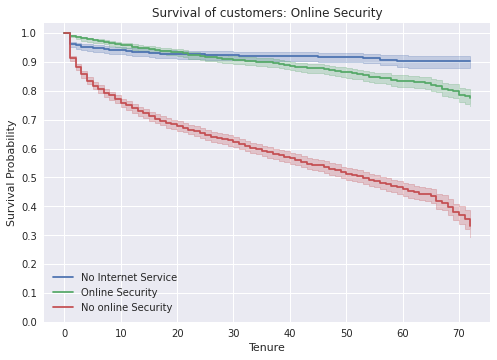

In [ ]:
no_internetService = (survivaldata['InternetService_No'] == 1)
onlineSecurity = (survivaldata['OnlineSecurity_1'] == 1)
no_onlineSecurity = ((survivaldata['InternetService_No'] == 0) & (survivaldata['OnlineSecurity_1'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[onlineSecurity],event_observed = eventvar[onlineSecurity],label = "Online Security")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_onlineSecurity],event_observed = eventvar[no_onlineSecurity],label = "No online Security")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Online Security')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['OnlineSecurity'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

Online Backup

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         196.62 <0.005    145.98

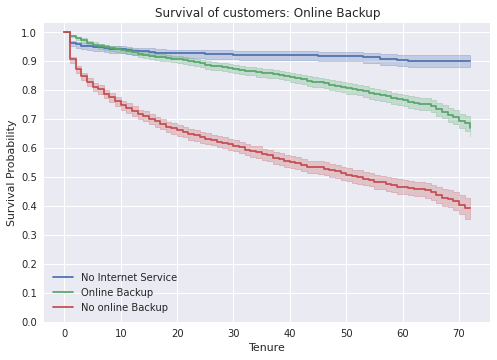

In [ ]:
no_internetService = (survivaldata['InternetService_No'] == 1)
onlineBackup = (survivaldata['OnlineBackup_1'] == 1)
no_onlineBackup = ((survivaldata['InternetService_No'] == 0) & (survivaldata['OnlineBackup_1'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[onlineBackup],event_observed = eventvar[onlineBackup],label = "Online Backup")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_onlineBackup],event_observed = eventvar[no_onlineBackup],label = "No online Backup")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Online Backup')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['OnlineBackup'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

Device Protection

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         167.21 <0.005    124.64

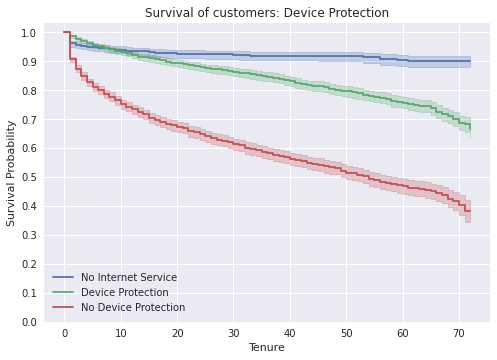

In [ ]:
no_internetService = (survivaldata['InternetService_No'] == 1)
DeviceProtection = (survivaldata['DeviceProtection_1'] == 1)
no_DeviceProtection = ((survivaldata['InternetService_No'] == 0) & (survivaldata['DeviceProtection_1'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[DeviceProtection],event_observed = eventvar[DeviceProtection],label = "Device Protection")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_DeviceProtection],event_observed = eventvar[no_DeviceProtection],label = "No Device Protection")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Device Protection')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['DeviceProtection'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

TECH SUPPORT

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         349.00 <0.005    256.30

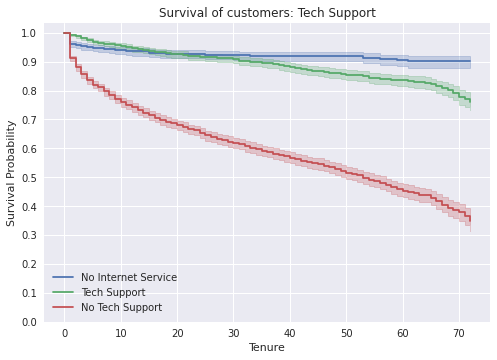

In [ ]:
no_internetService = (survivaldata['InternetService_No'] == 1)
TechSupport = (survivaldata['TechSupport_1'] == 1)
no_TechSupport = ((survivaldata['InternetService_No'] == 0) & (survivaldata['TechSupport_1'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[TechSupport],event_observed = eventvar[TechSupport],label = "Tech Support")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_TechSupport],event_observed = eventvar[no_TechSupport],label = "No Tech Support")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Tech Support')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['TechSupport'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

STREAMING TV

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           4.09 0.04      4.53

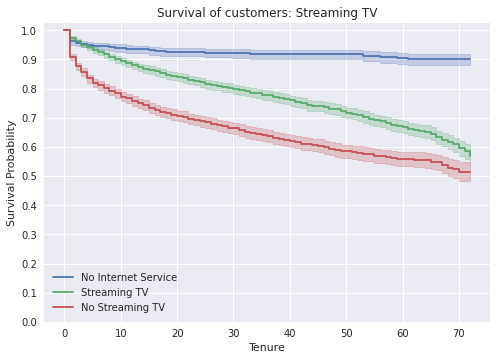

In [ ]:
no_internetService = (survivaldata['InternetService_No'] == 1)
StreamingTV = (survivaldata['StreamingTV_1'] == 1)
no_StreamingTV = ((survivaldata['InternetService_No'] == 0) & (survivaldata['StreamingTV_1'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[StreamingTV],event_observed = eventvar[StreamingTV],label = "Streaming TV")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_StreamingTV],event_observed = eventvar[no_StreamingTV],label = "No Streaming TV")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Streaming TV')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['StreamingTV'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

STREAMING MOVIES

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           5.33 0.02      5.57

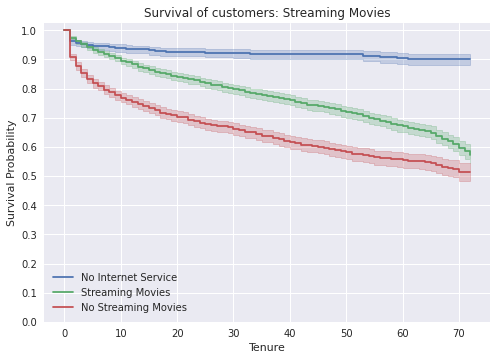

In [ ]:
no_internetService = (survivaldata['InternetService_No'] == 1)
StreamingMovies = (survivaldata['StreamingMovies_1'] == 1)
no_StreamingMovies = ((survivaldata['InternetService_No'] == 0) & (survivaldata['StreamingMovies_1'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[StreamingMovies],event_observed = eventvar[StreamingMovies],label = "Streaming Movies")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_StreamingMovies],event_observed = eventvar[no_StreamingMovies],label = "No Streaming Movies")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Streaming Movies')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['StreamingMovies'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

CONTRACT

KeyError: ignored

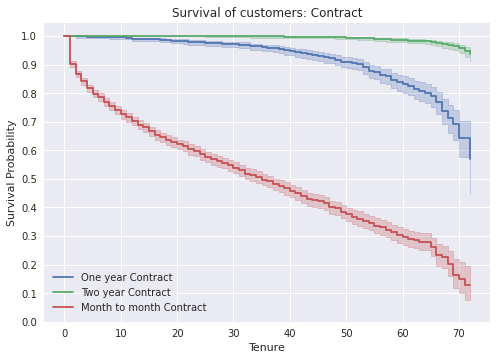

In [ ]:
Contract_One_year = (survivaldata['Contract_One year'] == 1)
Contract_Two_year = (survivaldata['Contract_Two year'] == 1)
Contract_month_to_month = ((survivaldata['Contract_One year'] == 0) & (survivaldata['Contract_Two year'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[Contract_One_year],event_observed = eventvar[Contract_One_year],label = "One year Contract")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[Contract_Two_year],event_observed = eventvar[Contract_Two_year],label = "Two year Contract")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[Contract_month_to_month],event_observed = eventvar[Contract_month_to_month],label = "Month to month Contract")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Contract')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['Contract'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

PAYMENT METHOD

KeyError: ignored

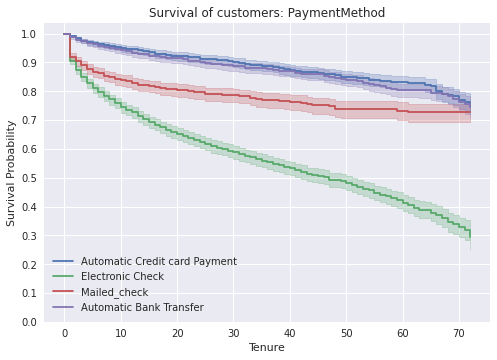

In [ ]:
automatic_Credit_Card = (survivaldata['PaymentMethod_Credit card (automatic)'] == 1)
electronic_check = (survivaldata['PaymentMethod_Electronic check'] == 1)
mailed_check = (survivaldata['PaymentMethod_Mailed check'] == 1)
automatic_Bank_Transfer = ((survivaldata['PaymentMethod_Credit card (automatic)'] == 0) & (survivaldata['PaymentMethod_Electronic check'] == 0) & (survivaldata['PaymentMethod_Mailed check'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[automatic_Credit_Card],event_observed = eventvar[automatic_Credit_Card],label = "Automatic Credit card Payment")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[electronic_check],event_observed = eventvar[electronic_check],label = "Electronic Check")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[mailed_check],event_observed = eventvar[mailed_check],label = "Mailed_check")
plot3 = kmf.plot(ax = plot2)

kmf.fit(timevar[automatic_Bank_Transfer],event_observed = eventvar[automatic_Bank_Transfer],label = "Automatic Bank Transfer")
plot4 = kmf.plot(ax = plot3)
                 
plt.title('Survival of customers: PaymentMethod')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['PaymentMethod'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

PAPERLESS BILLING

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         189.51 <0.005    140.82

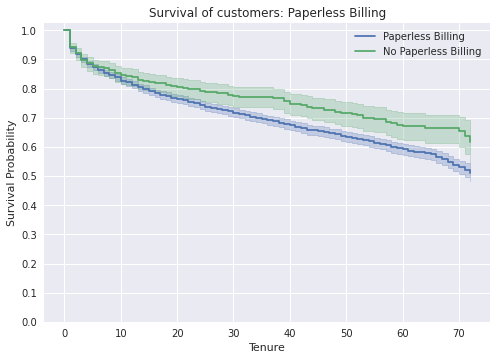

In [ ]:
PaperlessBilling = (survivaldata['PaperlessBilling_1'] == 1)
no_PaperlessBilling = (survivaldata['PaperlessBilling_1'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[PaperlessBilling],event_observed = eventvar[PaperlessBilling],label = "Paperless Billing")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_PhoneService],event_observed = eventvar[no_PhoneService],label = "No Paperless Billing")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Paperless Billing')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[PaperlessBilling], timevar[no_PaperlessBilling], event_observed_A=eventvar[PaperlessBilling], event_observed_B=eventvar[no_PaperlessBilling])
groups.print_summary()

SURVIVAL REGRESSION

In [ ]:
def datapreparation(filepath):
    
    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace = True, axis = 1)
    
    df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    df.TotalCharges.fillna(0, inplace = True)
    df.TotalCharges = df.TotalCharges.astype(float)
    
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)
   
    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
    
    return df

In [ ]:
regression_df = datapreparation("/WA_Fn-UseC_-Telco-Customer-Churn.csv.xls")
regression_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,0,1,0


#### Survival Regression Ananlysis using Cox Proportional Hazard model

In [ ]:
cph = CoxPHFitter()
cph.fit(regression_df, duration_col='tenure', event_col='Churn')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -12659.69
         time fit was run = 2023-03-23 08:15:01 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
gender                                  0.04       1.04       0.05            -0.05             0.13                 0.95                 1.14
SeniorCitizen                           0.03       1.04       0.06            -0.08             0.15                 0.93                 1.16
Partner                                -0.18       0.84       0.06            -0.29            -0.07                 0.75                 0.93
Dependents                             -0.09       0.91       0.07            -0.23             0.05                 0.80                 1.05
PhoneService                            0.83       2.29       0.47            -0.10             1.76                 0.90                 5.80
MultipleLines                           0.09       1.09       0.13            -0.16             0.33                 0.85                 1.40
OnlineSecurity                         -0.21       0.81       0.13            -0.47             0.05                 0.62                 1.05
OnlineBackup                           -0.06       0.95       0.13            -0.31             0.19                 0.74                 1.21
DeviceProtection                        0.09       1.09       0.13            -0.16             0.34                 0.85                 1.40
TechSupport                            -0.08       0.92       0.13            -0.34             0.17                 0.71                 1.19
StreamingTV                             0.28       1.32       0.24            -0.18             0.74                 0.83                 2.10
StreamingMovies                         0.29       1.33       0.24            -0.18             0.75                 0.84                 2.11
PaperlessBilling                        0.15       1.16       0.06             0.04             0.26                 1.04                 1.30
MonthlyCharges                          0.01       1.01       0.02            -0.03             0.06                 0.97                 1.06
TotalCharges                           -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
InternetService_Fiber optic             1.02       2.77       0.58            -0.12             2.15                 0.89                 8.59
InternetService_No                     -2.34       0.10       0.60            -3.51            -1.17                 0.03                 0.31
Contract_One year                      -1.27       0.28       0.10            -1.46            -1.07                 0.23                 0.34
Contract_Two year                      -3.70       0.02       0.20            -4.10            -3.31                 0.02                 0.04
PaymentMethod_Credit card (automatic)  -0.01       0.99       0.09            -0.19             0.17                 0.83                 1.18
PaymentMethod_Electronic check          0.39       1.47       0.07             0.24             0.53                 1.28                 1.70
PaymentMethod_Mailed check              0.51       1.67       0.09             0.34             0.68                 1.40                 1.98

                                        cmp to      z      p   -log2(p)
covariate                                                              
gender                                    0.00   0.85   0.

In [ ]:
cph.score_

AttributeError: ignored

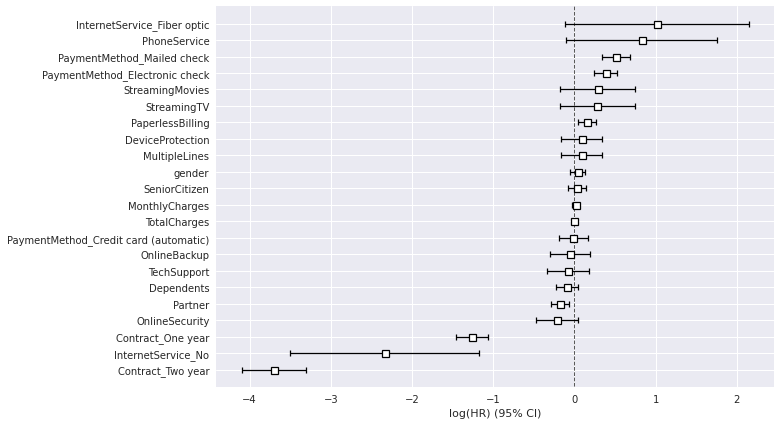

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
cph.plot(ax = ax);

In [ ]:
test_id = regression_df.sample(1)

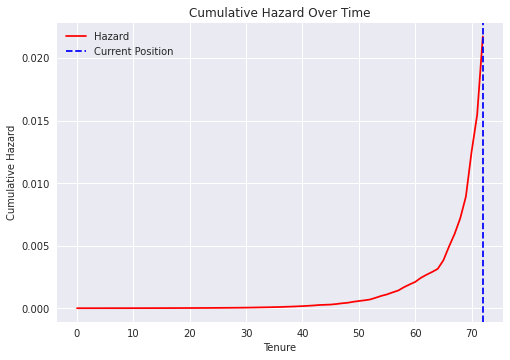

In [ ]:
fig, ax = plt.subplots()
cph.predict_cumulative_hazard(test_id).plot(ax = ax, color = 'red')
plt.axvline(x=test_id.tenure.values[0], color = 'blue', linestyle='--')
plt.legend(labels=['Hazard','Current Position'])
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Cumulative Hazard', size = 10)
ax.set_title('Cumulative Hazard Over Time');

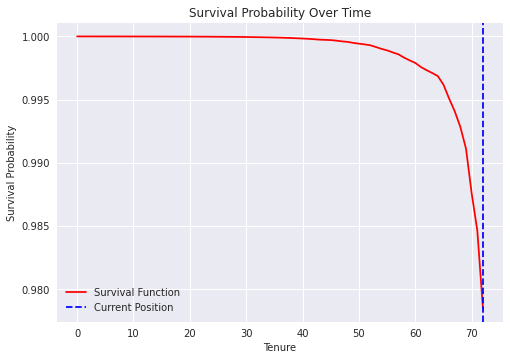

In [ ]:
fig, ax = plt.subplots()
cph.predict_survival_function(test_id).plot(ax = ax, color = 'red')
plt.axvline(x=test_id.tenure.values[0], color = 'blue', linestyle='--')
plt.legend(labels=['Survival Function','Current Position'])
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Survival Probability', size = 10)
ax.set_title('Survival Probability Over Time');

Saving the model

In [ ]:
import pickle
pickle.dump(cph, open('survivemodel.pkl','wb'))

## Customer Lifetime Value

To calculate customer lifetime value, I would multiply the Monthly charges the customer is paying to Telcom and the expected life time of the customer. 

I utilize the survival function of a customer to calculate its expected life time. I would like to be little bit conservative and consider the customer is churned when the survival probability of him is 10%. 

In [ ]:
def LTV(info):
    life = cph.predict_survival_function(info).reset_index()
    life.columns = ['Tenure', 'Probability']
    max_life = life.Tenure[life.Probability > 0.1].max()
    
    LTV = max_life * info['MonthlyCharges'].values[0]
    return LTV

In [ ]:
print('LTV of a testid is:', LTV(test_id), 'dollars.')

LTV of a testid is: 4698.0 dollars.
